***
# Supervised Learning : Exploring Classification Models for Predicting Categorical Responses

***
### John Pauline Pineda <br> <br> *November 29, 2023*
***

* [**1. Table of Contents**](#TOC)
    * [1.1 Data Background](#1.1)
    * [1.2 Data Description](#1.2)
    * [1.3 Data Quality Assessment](#1.3)
    * [1.4 Data Preprocessing](#1.4)
        * [1.4.1 Data Cleaning](#1.4.1)
        * [1.4.2 Missing Data Imputation](#1.4.2)
        * [1.4.3 Outlier Treatment](#1.4.3)
        * [1.4.4 Collinearity](#1.4.4)
        * [1.4.5 Shape Transformation](#1.4.5)
        * [1.4.6 Centering and Scaling](#1.4.6)
        * [1.4.7 Data Encoding](#1.4.7)
        * [1.4.8 Preprocessed Data Description](#1.4.8)
    * [1.5 Data Exploration](#1.5)
        * [1.5.1 Exploratory Data Analysis](#1.5.1)
        * [1.5.2 Hypothesis Testing](#1.5.2)
    * [1.6 Model Development With Hyperparameter Tuning](#1.6)
        * [1.6.1 Premodelling Data Description](#1.6.1)
        * [1.6.2 Logistic Regression](#1.6.2)
        * [1.6.3 Decision Trees](#1.6.3)
        * [1.6.4 Random Forest](#1.6.4)
        * [1.6.5 Support Vector Machine](#1.6.5)
    * [1.7 Model Development With Class Weights](#1.7)
        * [1.7.1 Premodelling Data Description](#1.7.1)
        * [1.7.2 Logistic Regression](#1.7.2)
        * [1.7.3 Decision Trees](#1.7.3)
        * [1.7.4 Random Forest](#1.7.4)
        * [1.7.5 Support Vector Machine](#1.7.5)
    * [1.8 Model Development With SMOTE Upsampling](#1.8)
        * [1.8.1 Premodelling Data Description](#1.8.1)
        * [1.8.2 Logistic Regression](#1.8.2)
        * [1.8.3 Decision Trees](#1.8.3)
        * [1.8.4 Random Forest](#1.8.4)
        * [1.8.5 Support Vector Machine](#1.8.5)
    * [1.9 Model Development With CNN Downsampling](#1.9)
        * [1.9.1 Premodelling Data Description](#1.9.1)
        * [1.9.2 Logistic Regression](#1.9.2)
        * [1.9.3 Decision Trees](#1.9.3)
        * [1.9.4 Random Forest](#1.9.4)
        * [1.9.5 Support Vector Machine](#1.9.5)
    * [1.10 Model Development With Stacking Ensemble Learning](#1.10)
        * [1.9.1 Premodelling Data Description](#1.9.1)
        * [1.9.2 Logistic Regression](#1.9.1)
    * [1.11 Consolidated Findings](#1.7) 
* [**2. Summary**](#Summary)   
* [**3. References**](#References)

***

# 1. Table of Contents <a class="anchor" id="TOC"></a>

This project implements different predictive modelling procedures for dichotomous categorical responses using various helpful packages in <mark style="background-color: #CCECFF"><b>Python</b></mark>. Models applied in the analysis to predict dichotomous categorical responses included the **Logistic Regression**, **Decision Trees**, **Random Forest**, **Naive Bayes** and **Support Vector Machine** algorithms. Remedial procedures on addressing class imbalance including **Class Weighting**, **Synthetic Minority Oversampling Technique** and **Condensed Nearest Neighbors** were similarly considered, as applicable. Ensemble learning using **Stacking** which consolidate many different models types on the same data and using another model to learn how to best combine the predictions was also explored. All results were consolidated in a [<span style="color: #FF0000"><b>Summary</b></span>](#Summary) presented at the end of the document.

[Binary classification learning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) refers to a predictive modelling problem where only two class labels are predicted for a given sample of input data. These models use the training data set and calculate how to best map instances of input data to the specific class labels. Typically, binary classification tasks involve one class that is the normal state (assigned the class label 0) and another class that is the abnormal state (assigned the class label 1). It is common to structure a binary classification task with a model that predicts a Bernoulli probability distribution for each instance. The Bernoulli distribution is a discrete probability distribution that covers a case where an event will have a binary outcome as either a 0 or 1. For a binary classification, this means that the model predicts a probability of an instance belonging to class 1, or the abnormal state. The algorithms applied in this study attempt to categorize the input data and form dichotomous groups based on their similarities.

## 1.1. Data Background <a class="anchor" id="1.1"></a>

Datasets used for the analysis were separately gathered and consolidated from various sources including: 
1. Cancer Rates from [World Population Review](https://worldpopulationreview.com/country-rankings/cancer-rates-by-country)
2. Social Protection and Labor Indicator from [World Bank](https://data.worldbank.org/topic/social-protection-and-labor?view=chart)
3. Education Indicator from [World Bank](https://data.worldbank.org/topic/education?view=chart)
4. Economy and Growth Indicator from [World Bank](https://data.worldbank.org/topic/economy-and-growth?view=chart)
5. Environment Indicator from [World Bank](https://data.worldbank.org/topic/environment?view=chart)
6. Climate Change Indicator from [World Bank](https://data.worldbank.org/topic/climate-change?view=chart)
7. Agricultural and Rural Development Indicator from [World Bank](https://data.worldbank.org/topic/agriculture-and-rural-development?view=chart)
8. Social Development Indicator from [World Bank](https://data.worldbank.org/topic/social-development?view=chart)
9. Health Indicator from [World Bank](https://data.worldbank.org/topic/health?view=chart)
10. Science and Technology Indicator from [World Bank](https://data.worldbank.org/topic/science-and-technology?view=chart)
11. Urban Development Indicator from [World Bank](https://data.worldbank.org/topic/urban-development?view=chart)
12. Human Development Indices from [Human Development Reports](https://hdr.undp.org/data-center/human-development-index#/indicies/HDI)
13. Environmental Performance Indices from [Yale Center for Environmental Law and Policy](https://epi.yale.edu/epi-results/2022/component/epi)

This study hypothesized that various global development indicators and indices influence cancer rates across countries.

The target variable for the study is:
* <span style="color: #FF0000">CANRAT</span> - Dichotomized category based on age-standardized cancer rates, per 100K population (2022)

The predictor variables for the study are:
* <span style="color: #FF0000">GDPPER</span> - GDP per person employed, current US Dollars (2020)
* <span style="color: #FF0000">URBPOP</span> - Urban population, % of total population (2020)
* <span style="color: #FF0000">PATRES</span> - Patent applications by residents, total count (2020)
* <span style="color: #FF0000">RNDGDP</span> - Research and development expenditure, % of GDP (2020)
* <span style="color: #FF0000">POPGRO</span> - Population growth, annual % (2020)
* <span style="color: #FF0000">LIFEXP</span> - Life expectancy at birth, total in years (2020)
* <span style="color: #FF0000">TUBINC</span> - Incidence of tuberculosis, per 100K population (2020)
* <span style="color: #FF0000">DTHCMD</span> - Cause of death by communicable diseases and maternal, prenatal and nutrition conditions,  % of total (2019)
* <span style="color: #FF0000">AGRLND</span> - Agricultural land,  % of land area (2020)
* <span style="color: #FF0000">GHGEMI</span> - Total greenhouse gas emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">RELOUT</span> - Renewable electricity output, % of total electricity output (2015)
* <span style="color: #FF0000">METEMI</span> - Methane emissions, kt of CO2 equivalent (2020)
* <span style="color: #FF0000">FORARE</span> - Forest area, % of land area (2020)
* <span style="color: #FF0000">CO2EMI</span> - CO2 emissions, metric tons per capita (2020)
* <span style="color: #FF0000">PM2EXP</span> - PM2.5 air pollution, population exposed to levels exceeding WHO guideline value,  % of total (2017)
* <span style="color: #FF0000">POPDEN</span> - Population density, people per sq. km of land area (2020)
* <span style="color: #FF0000">GDPCAP</span> - GDP per capita, current US Dollars (2020)
* <span style="color: #FF0000">ENRTER</span> - Tertiary school enrollment, % gross (2020)
* <span style="color: #FF0000">HDICAT</span> - Human development index, ordered category (2020)
* <span style="color: #FF0000">EPISCO</span> - Environment performance index , score (2022)


## 1.2. Data Description <a class="anchor" id="1.2"></a>

1. The dataset is comprised of:
    * **177 rows** (observations)
    * **22 columns** (variables)
        * **1/22 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/22 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **19/22 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">PATRES</span>
             * <span style="color: #FF0000">RNDGDP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">RELOUT</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">ENRTER</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/22 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [1]:
##################################
# Loading Python Libraries
##################################
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
%matplotlib inline

from operator import add,mul,truediv
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
##################################
# Loading the dataset
##################################
cancer_rate = pd.read_csv('CategoricalCancerRates.csv')

In [3]:
##################################
# Performing a general exploration of the dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [4]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate.dtypes)

Column Names and Data Types:


COUNTRY     object
CANRAT      object
GDPPER     float64
URBPOP     float64
PATRES     float64
RNDGDP     float64
POPGRO     float64
LIFEXP     float64
TUBINC     float64
DTHCMD     float64
AGRLND     float64
GHGEMI     float64
RELOUT     float64
METEMI     float64
FORARE     float64
CO2EMI     float64
PM2EXP     float64
POPDEN     float64
ENRTER     float64
GDPCAP     float64
HDICAT      object
EPISCO     float64
dtype: object

In [5]:
##################################
# Taking a snapshot of the dataset
##################################
cancer_rate.head()

,COUNTRY,CANRAT,GDPPER,URBPOP,PATRES,RNDGDP,POPGRO,LIFEXP,TUBINC,DTHCMD,...,RELOUT,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,ENRTER,GDPCAP,HDICAT,EPISCO
0,Australia,High,98380.63601,86.241,2368.0,NaN,1.235701,83.200000,7.2,4.941054,...,13.637841,131484.763200,17.421315,14.772658,24.893584,3.335312,110.139221,51722.06900,VH,60.1
1,New Zealand,High,77541.76438,86.699,348.0,NaN,2.204789,82.256098,7.2,4.354730,...,80.081439,32241.937000,37.570126,6.160799,NaN,19.331586,75.734833,41760.59478,VH,56.7
2,Ireland,High,198405.87500,63.653,75.0,1.23244,1.029111,82.556098,5.3,5.684596,...,27.965408,15252.824630,11.351720,6.768228,0.274092,72.367281,74.680313,85420.19086,VH,57.4
3,United States,High,130941.63690,82.664,269586.0,3.42287,0.964348,76.980488,2.3,5.302060,...,13.228593,748241.402900,33.866926,13.032828,3.343170,36.240985,87.567657,63528.63430,VH,51.1
4,Denmark,High,113300.60110,88.116,1261.0,2.96873,0.291641,81.602439,4.1,6.826140,...,65.505925,7778.773921,15.711000,4.691237,56.914456,145.785100,82.664330,60915.42440,VH,77.9


In [6]:
##################################
# Setting the levels of the categorical variables
##################################
cancer_rate['CANRAT'] = cancer_rate['CANRAT'].astype('category')
cancer_rate['CANRAT'] = cancer_rate['CANRAT'].cat.set_categories(['Low', 'High'], ordered=True)
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].astype('category')
cancer_rate['HDICAT'] = cancer_rate['HDICAT'].cat.set_categories(['L', 'M', 'H', 'VH'], ordered=True)

In [7]:
##################################
# Performing a general exploration of the numeric variables
##################################
print('Numeric Variable Summary:')
display(cancer_rate.describe(include='number').transpose())

Numeric Variable Summary:


,count,mean,std,min,25%,50%,75%,max
GDPPER,165.0,45284.424283,3.941794e+04,1718.804896,13545.254510,34024.900890,66778.416050,2.346469e+05
URBPOP,174.0,59.788121,2.280640e+01,13.345000,42.432750,61.701500,79.186500,1.000000e+02
PATRES,108.0,20607.388889,1.340683e+05,1.000000,35.250000,244.500000,1297.750000,1.344817e+06
RNDGDP,74.0,1.197474,1.189956e+00,0.039770,0.256372,0.873660,1.608842,5.354510e+00
POPGRO,174.0,1.127028,1.197718e+00,-2.079337,0.236900,1.179959,2.031154,3.727101e+00
LIFEXP,174.0,71.746113,7.606209e+00,52.777000,65.907500,72.464610,77.523500,8.456000e+01
TUBINC,174.0,105.005862,1.367229e+02,0.770000,12.000000,44.500000,147.750000,5.920000e+02
DTHCMD,170.0,21.260521,1.927333e+01,1.283611,6.078009,12.456279,36.980457,6.520789e+01
AGRLND,174.0,38.793456,2.171551e+01,0.512821,20.130276,40.386649,54.013754,8.084112e+01
GHGEMI,170.0,259582.709895,1.118550e+06,179.725150,12527.487367,41009.275980,116482.578575,1.294287e+07


In [8]:
##################################
# Performing a general exploration of the object variable
##################################
print('Object Variable Summary:')
display(cancer_rate.describe(include='object').transpose())

Object Variable Summary:


,count,unique,top,freq
COUNTRY,177,177,Australia,1


In [9]:
##################################
# Performing a general exploration of the categorical variables
##################################
print('Categorical Variable Summary:')
display(cancer_rate.describe(include='category').transpose())

Categorical Variable Summary:


,count,unique,top,freq
CANRAT,177,2,Low,132
HDICAT,167,4,VH,59


In [10]:
##################################
# Performing a general exploration of the response variable
##################################
cancer_rate.CANRAT.value_counts(normalize = True)

Low     0.745763
High    0.254237
Name: CANRAT, dtype: float64

## 1.3. Data Quality Assessment <a class="anchor" id="1.3"></a>

Data quality findings based on assessment are as follows:
1. No duplicated rows observed.
2. Missing data noted for 20 variables with Null.Count>0 and Fill.Rate<1.0.
    * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
    * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
    * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
    * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">EPISCO</span>: Null.Count = 12, Fill.Rate = 0.932
    * <span style="color: #FF0000">HDICAT</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 10, Fill.Rate = 0.943
    * <span style="color: #FF0000">DTHCMD</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">METEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">CO2EMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GDPCAP</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">GHGEMI</span>: Null.Count = 7, Fill.Rate = 0.960
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 4, Fill.Rate = 0.977
    * <span style="color: #FF0000">TUBINC</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">AGRLND</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPGRO</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">POPDEN</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">URBPOP</span>: Null.Count = 3, Fill.Rate = 0.983
    * <span style="color: #FF0000">LIFEXP</span>: Null.Count = 3, Fill.Rate = 0.983
3. 120 observations noted with at least 1 missing data. From this number, 14 observations reported high Missing.Rate>0.2.
    * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
    * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
    * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
    * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
    * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227
4. Low variance observed for 1 variable with First.Second.Mode.Ratio>5.
    * <span style="color: #FF0000">PM2EXP</span>: First.Second.Mode.Ratio = 53.000
5. No low variance observed for any variable with Unique.Count.Ratio>10.
6. High skewness observed for 5 variables with Skewness>3 or Skewness<(-3).
    * <span style="color: #FF0000">POPDEN</span>: Skewness = +10.267
    * <span style="color: #FF0000">GHGEMI</span>: Skewness = +9.496
    * <span style="color: #FF0000">PATRES</span>: Skewness = +9.284
    * <span style="color: #FF0000">METEMI</span>: Skewness = +5.801
    * <span style="color: #FF0000">PM2EXP</span>: Skewness = -3.141

In [11]:
##################################
# Counting the number of duplicated rows
##################################
cancer_rate.duplicated().sum()

0

In [12]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate.dtypes)

In [13]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate.columns)

In [14]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate)] * len(cancer_rate.columns))

In [15]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate.isna().sum(axis=0))

In [16]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate.count())

In [17]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [18]:
##################################
# Formulating the summary
# for all columns
##################################
all_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                              data_type_list,
                                              row_count_list,
                                              non_null_count_list,
                                              null_count_list,
                                              fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(all_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,COUNTRY,object,177,177,0,1.000000
1,CANRAT,category,177,177,0,1.000000
2,GDPPER,float64,177,165,12,0.932203
3,URBPOP,float64,177,174,3,0.983051
4,PATRES,float64,177,108,69,0.610169
5,RNDGDP,float64,177,74,103,0.418079
6,POPGRO,float64,177,174,3,0.983051
7,LIFEXP,float64,177,174,3,0.983051
8,TUBINC,float64,177,174,3,0.983051
9,DTHCMD,float64,177,170,7,0.960452


In [19]:
##################################
# Counting the number of columns
# with Fill.Rate < 1.00
##################################
len(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)])

20

In [20]:
##################################
# Identifying the columns
# with Fill.Rate < 1.00
##################################
display(all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<1)].sort_values(by=['Fill.Rate'], ascending=True))

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
5,RNDGDP,float64,177,74,103,0.418079
4,PATRES,float64,177,108,69,0.610169
18,ENRTER,float64,177,116,61,0.655367
12,RELOUT,float64,177,153,24,0.864407
2,GDPPER,float64,177,165,12,0.932203
21,EPISCO,float64,177,165,12,0.932203
20,HDICAT,category,177,167,10,0.943503
16,PM2EXP,float64,177,167,10,0.943503
9,DTHCMD,float64,177,170,7,0.960452
13,METEMI,float64,177,170,7,0.960452


In [21]:
##################################
# Identifying the rows
# with Fill.Rate < 0.90
##################################
column_low_fill_rate = all_column_quality_summary[(all_column_quality_summary['Fill.Rate']<0.90)]

In [22]:
##################################
# Gathering the metadata labels for each observation
##################################
row_metadata_list = cancer_rate["COUNTRY"].values.tolist()

In [23]:
##################################
# Gathering the number of columns for each observation
##################################
column_count_list = list([len(cancer_rate.columns)] * len(cancer_rate))

In [24]:
##################################
# Gathering the number of missing data for each row
##################################
null_row_list = list(cancer_rate.isna().sum(axis=1))

In [25]:
##################################
# Gathering the missing data percentage for each column
##################################
missing_rate_list = map(truediv, null_row_list, column_count_list)

In [26]:
##################################
# Identifying the rows
# with missing data
##################################
all_row_quality_summary = pd.DataFrame(zip(row_metadata_list,
                                           column_count_list,
                                           null_row_list,
                                           missing_rate_list), 
                                        columns=['Row.Name',
                                                 'Column.Count',
                                                 'Null.Count',                                                 
                                                 'Missing.Rate'])
display(all_row_quality_summary)

,Row.Name,Column.Count,Null.Count,Missing.Rate
0,Australia,22,1,0.045455
1,New Zealand,22,2,0.090909
2,Ireland,22,0,0.000000
3,United States,22,0,0.000000
4,Denmark,22,0,0.000000
...,...,...,...,...
172,Congo Republic,22,3,0.136364
173,Bhutan,22,2,0.090909
174,Nepal,22,2,0.090909
175,Gambia,22,4,0.181818


In [27]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.00
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.00)])

120

In [28]:
##################################
# Counting the number of rows
# with Missing.Rate > 0.20
##################################
len(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)])

14

In [29]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
row_high_missing_rate = all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)]

In [30]:
##################################
# Identifying the rows
# with Missing.Rate > 0.20
##################################
display(all_row_quality_summary[(all_row_quality_summary['Missing.Rate']>0.20)].sort_values(by=['Missing.Rate'], ascending=False))

,Row.Name,Column.Count,Null.Count,Missing.Rate
35,Guadeloupe,22,20,0.909091
39,Martinique,22,20,0.909091
56,French Guiana,22,20,0.909091
13,New Caledonia,22,11,0.500000
44,French Polynesia,22,11,0.500000
75,Guam,22,11,0.500000
53,Puerto Rico,22,9,0.409091
85,North Korea,22,6,0.272727
132,Somalia,22,6,0.272727
168,South Sudan,22,6,0.272727


In [31]:
##################################
# Formulating the dataset
# with numeric columns only
##################################
cancer_rate_numeric = cancer_rate.select_dtypes(include='number')

In [32]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = cancer_rate_numeric.columns

In [33]:
##################################
# Gathering the minimum value for each numeric column
##################################
numeric_minimum_list = cancer_rate_numeric.min()

In [34]:
##################################
# Gathering the mean value for each numeric column
##################################
numeric_mean_list = cancer_rate_numeric.mean()

In [35]:
##################################
# Gathering the median value for each numeric column
##################################
numeric_median_list = cancer_rate_numeric.median()

In [36]:
##################################
# Gathering the maximum value for each numeric column
##################################
numeric_maximum_list = cancer_rate_numeric.max()

In [37]:
##################################
# Gathering the first mode values for each numeric column
##################################
numeric_first_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[0] for x in cancer_rate_numeric]

In [38]:
##################################
# Gathering the second mode values for each numeric column
##################################
numeric_second_mode_list = [cancer_rate[x].value_counts(dropna=True).index.tolist()[1] for x in cancer_rate_numeric]

In [39]:
##################################
# Gathering the count of first mode values for each numeric column
##################################
numeric_first_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_numeric]

In [40]:
##################################
# Gathering the count of second mode values for each numeric column
##################################
numeric_second_mode_count_list = [cancer_rate_numeric[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_numeric]

In [41]:
##################################
# Gathering the first mode to second mode ratio for each numeric column
##################################
numeric_first_second_mode_ratio_list = map(truediv, numeric_first_mode_count_list, numeric_second_mode_count_list)

In [42]:
##################################
# Gathering the count of unique values for each numeric column
##################################
numeric_unique_count_list = cancer_rate_numeric.nunique(dropna=True)

In [43]:
##################################
# Gathering the number of observations for each numeric column
##################################
numeric_row_count_list = list([len(cancer_rate_numeric)] * len(cancer_rate_numeric.columns))

In [44]:
##################################
# Gathering the unique to count ratio for each numeric column
##################################
numeric_unique_count_ratio_list = map(truediv, numeric_unique_count_list, numeric_row_count_list)

In [45]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_numeric.skew()

In [46]:
##################################
# Gathering the kurtosis value for each numeric column
##################################
numeric_kurtosis_list = cancer_rate_numeric.kurtosis()

In [47]:
numeric_column_quality_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                numeric_minimum_list,
                                                numeric_mean_list,
                                                numeric_median_list,
                                                numeric_maximum_list,
                                                numeric_first_mode_list,
                                                numeric_second_mode_list,
                                                numeric_first_mode_count_list,
                                                numeric_second_mode_count_list,
                                                numeric_first_second_mode_ratio_list,
                                                numeric_unique_count_list,
                                                numeric_row_count_list,
                                                numeric_unique_count_ratio_list,
                                                numeric_skewness_list,
                                                numeric_kurtosis_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Minimum',
                                                 'Mean',
                                                 'Median',
                                                 'Maximum',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio',
                                                 'Skewness',
                                                 'Kurtosis'])
display(numeric_column_quality_summary)

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
0,GDPPER,1718.804896,45284.424283,34024.900890,2.346469e+05,98380.636010,42154.178100,1,1,1.000000,165,177,0.932203,1.517574,3.471992
1,URBPOP,13.345000,59.788121,61.701500,1.000000e+02,100.000000,52.516000,2,1,2.000000,173,177,0.977401,-0.210702,-0.962847
2,PATRES,1.000000,20607.388889,244.500000,1.344817e+06,6.000000,2.000000,4,3,1.333333,97,177,0.548023,9.284436,91.187178
3,RNDGDP,0.039770,1.197474,0.873660,5.354510e+00,1.232440,0.962180,1,1,1.000000,74,177,0.418079,1.396742,1.695957
4,POPGRO,-2.079337,1.127028,1.179959,3.727101e+00,1.235701,1.483129,1,1,1.000000,174,177,0.983051,-0.195161,-0.423580
5,LIFEXP,52.777000,71.746113,72.464610,8.456000e+01,83.200000,68.687000,1,1,1.000000,174,177,0.983051,-0.357965,-0.649601
6,TUBINC,0.770000,105.005862,44.500000,5.920000e+02,12.000000,7.200000,4,3,1.333333,131,177,0.740113,1.746333,2.429368
7,DTHCMD,1.283611,21.260521,12.456279,6.520789e+01,4.941054,42.079403,1,1,1.000000,170,177,0.960452,0.900509,-0.691541
8,AGRLND,0.512821,38.793456,40.386649,8.084112e+01,46.252480,72.006469,1,1,1.000000,174,177,0.983051,0.074000,-0.926249
9,GHGEMI,179.725150,259582.709895,41009.275980,1.294287e+07,571903.119900,3000.932259,1,1,1.000000,170,177,0.960452,9.496120,101.637308


In [48]:
##################################
# Counting the number of numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)])

1

In [49]:
##################################
# Identifying the numeric columns
# with First.Second.Mode.Ratio > 5.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['First.Second.Mode.Ratio']>5)].sort_values(by=['First.Second.Mode.Ratio'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
14,PM2EXP,0.274092,91.940595,100.0,100.0,100.0,100.0,106,2,53.0,61,177,0.344633,-3.141557,9.032386


In [50]:
##################################
# Counting the number of numeric columns
# with Unique.Count.Ratio > 10.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [51]:
##################################
# Counting the number of numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
len(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))])

5

In [52]:
##################################
# Identifying the numeric columns
# with Skewness > 3.00 or Skewness < -3.00
##################################
display(numeric_column_quality_summary[(numeric_column_quality_summary['Skewness']>3) | (numeric_column_quality_summary['Skewness']<(-3))].sort_values(by=['Skewness'], ascending=False))

,Numeric.Column.Name,Minimum,Mean,Median,Maximum,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio,Skewness,Kurtosis
15,POPDEN,2.115134,200.886765,77.983133,7.918951e+03,3.335312,13.300785,1,1,1.000000,174,177,0.983051,10.267750,119.995256
9,GHGEMI,179.725150,259582.709895,41009.275980,1.294287e+07,571903.119900,3000.932259,1,1,1.000000,170,177,0.960452,9.496120,101.637308
2,PATRES,1.000000,20607.388889,244.500000,1.344817e+06,6.000000,2.000000,4,3,1.333333,97,177,0.548023,9.284436,91.187178
11,METEMI,11.596147,47876.133575,11118.976025,1.186285e+06,131484.763200,1326.034028,1,1,1.000000,170,177,0.960452,5.801014,38.661386
14,PM2EXP,0.274092,91.940595,100.000000,1.000000e+02,100.000000,100.000000,106,2,53.000000,61,177,0.344633,-3.141557,9.032386


In [53]:
##################################
# Formulating the dataset
# with object column only
##################################
cancer_rate_object = cancer_rate.select_dtypes(include='object')

In [54]:
##################################
# Gathering the variable names for the object column
##################################
object_variable_name_list = cancer_rate_object.columns

In [55]:
##################################
# Gathering the first mode values for the object column
##################################
object_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_object]

In [56]:
##################################
# Gathering the second mode values for each object column
##################################
object_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_object]

In [57]:
##################################
# Gathering the count of first mode values for each object column
##################################
object_first_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_object]

In [58]:
##################################
# Gathering the count of second mode values for each object column
##################################
object_second_mode_count_list = [cancer_rate_object[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_object]

In [59]:
##################################
# Gathering the first mode to second mode ratio for each object column
##################################
object_first_second_mode_ratio_list = map(truediv, object_first_mode_count_list, object_second_mode_count_list)

In [60]:
##################################
# Gathering the count of unique values for each object column
##################################
object_unique_count_list = cancer_rate_object.nunique(dropna=True)

In [61]:
##################################
# Gathering the number of observations for each object column
##################################
object_row_count_list = list([len(cancer_rate_object)] * len(cancer_rate_object.columns))

In [62]:
##################################
# Gathering the unique to count ratio for each object column
##################################
object_unique_count_ratio_list = map(truediv, object_unique_count_list, object_row_count_list)

In [63]:
object_column_quality_summary = pd.DataFrame(zip(object_variable_name_list,
                                                 object_first_mode_list,
                                                 object_second_mode_list,
                                                 object_first_mode_count_list,
                                                 object_second_mode_count_list,
                                                 object_first_second_mode_ratio_list,
                                                 object_unique_count_list,
                                                 object_row_count_list,
                                                 object_unique_count_ratio_list), 
                                        columns=['Object.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(object_column_quality_summary)

,Object.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,COUNTRY,Australia,Mauritius,1,1,1.0,177,177,1.0


In [64]:
##################################
# Counting the number of object columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [65]:
##################################
# Counting the number of object columns
# with Unique.Count.Ratio > 10.00
##################################
len(object_column_quality_summary[(object_column_quality_summary['Unique.Count.Ratio']>10)])

0

In [66]:
##################################
# Formulating the dataset
# with categorical columns only
##################################
cancer_rate_categorical = cancer_rate.select_dtypes(include='category')

In [67]:
##################################
# Gathering the variable names for the categorical column
##################################
categorical_variable_name_list = cancer_rate_categorical.columns

In [68]:
##################################
# Gathering the first mode values for each categorical column
##################################
categorical_first_mode_list = [cancer_rate[x].value_counts().index.tolist()[0] for x in cancer_rate_categorical]

In [69]:
##################################
# Gathering the second mode values for each categorical column
##################################
categorical_second_mode_list = [cancer_rate[x].value_counts().index.tolist()[1] for x in cancer_rate_categorical]

In [70]:
##################################
# Gathering the count of first mode values for each categorical column
##################################
categorical_first_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[0]]).sum() for x in cancer_rate_categorical]

In [71]:
##################################
# Gathering the count of second mode values for each categorical column
##################################
categorical_second_mode_count_list = [cancer_rate_categorical[x].isin([cancer_rate[x].value_counts(dropna=True).index.tolist()[1]]).sum() for x in cancer_rate_categorical]

In [72]:
##################################
# Gathering the first mode to second mode ratio for each categorical column
##################################
categorical_first_second_mode_ratio_list = map(truediv, categorical_first_mode_count_list, categorical_second_mode_count_list)

In [73]:
##################################
# Gathering the count of unique values for each categorical column
##################################
categorical_unique_count_list = cancer_rate_categorical.nunique(dropna=True)

In [74]:
##################################
# Gathering the number of observations for each categorical column
##################################
categorical_row_count_list = list([len(cancer_rate_categorical)] * len(cancer_rate_categorical.columns))

In [75]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
categorical_unique_count_ratio_list = map(truediv, categorical_unique_count_list, categorical_row_count_list)

In [76]:
categorical_column_quality_summary = pd.DataFrame(zip(categorical_variable_name_list,
                                                    categorical_first_mode_list,
                                                    categorical_second_mode_list,
                                                    categorical_first_mode_count_list,
                                                    categorical_second_mode_count_list,
                                                    categorical_first_second_mode_ratio_list,
                                                    categorical_unique_count_list,
                                                    categorical_row_count_list,
                                                    categorical_unique_count_ratio_list), 
                                        columns=['Categorical.Column.Name',
                                                 'First.Mode',
                                                 'Second.Mode',
                                                 'First.Mode.Count',
                                                 'Second.Mode.Count',
                                                 'First.Second.Mode.Ratio',
                                                 'Unique.Count',
                                                 'Row.Count',
                                                 'Unique.Count.Ratio'])
display(categorical_column_quality_summary)

,Categorical.Column.Name,First.Mode,Second.Mode,First.Mode.Count,Second.Mode.Count,First.Second.Mode.Ratio,Unique.Count,Row.Count,Unique.Count.Ratio
0,CANRAT,Low,High,132,45,2.933333,2,177,0.011299
1,HDICAT,VH,H,59,39,1.512821,4,177,0.022599


In [77]:
##################################
# Counting the number of categorical columns
# with First.Second.Mode.Ratio > 5.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['First.Second.Mode.Ratio']>5)])

0

In [78]:
##################################
# Counting the number of categorical columns
# with Unique.Count.Ratio > 10.00
##################################
len(categorical_column_quality_summary[(categorical_column_quality_summary['Unique.Count.Ratio']>10)])

0

## 1.4. Data Preprocessing <a class="anchor" id="1.4"></a>


### 1.4.1 Data Cleaning <a class="anchor" id="1.4.1"></a>

1. Subsets of rows and columns with high rates of missing data were removed from the dataset:
    * 4 variables with Fill.Rate<0.9 were excluded for subsequent analysis.
        * <span style="color: #FF0000">RNDGDP</span>: Null.Count = 103, Fill.Rate = 0.418
        * <span style="color: #FF0000">PATRES</span>: Null.Count = 69, Fill.Rate = 0.610
        * <span style="color: #FF0000">ENRTER</span>: Null.Count = 61, Fill.Rate = 0.655
        * <span style="color: #FF0000">RELOUT</span>: Null.Count = 24, Fill.Rate = 0.864
    * 14 rows with Missing.Rate>0.2 were exluded for subsequent analysis.
        * <span style="color: #FF0000">COUNTRY=Guadeloupe</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=Martinique</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=French Guiana</span>: Missing.Rate= 0.909
        * <span style="color: #FF0000">COUNTRY=New Caledonia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=French Polynesia</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Guam</span>: Missing.Rate= 0.500
        * <span style="color: #FF0000">COUNTRY=Puerto Rico</span>: Missing.Rate= 0.409
        * <span style="color: #FF0000">COUNTRY=North Korea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Somalia</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=South Sudan</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Venezuela</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Libya</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Eritrea</span>: Missing.Rate= 0.227
        * <span style="color: #FF0000">COUNTRY=Yemen</span>: Missing.Rate= 0.227  
2. No variables were removed due to zero or near-zero variance.
3. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **15/18 predictor** (numeric)
             * <span style="color: #FF0000">GDPPER</span>
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">METEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [79]:
##################################
# Performing a general exploration of the original dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate.shape)

Dataset Dimensions: 


(177, 22)

In [80]:
##################################
# Filtering out the rows with
# with Missing.Rate > 0.20
##################################
cancer_rate_filtered_row = cancer_rate.drop(cancer_rate[cancer_rate.COUNTRY.isin(row_high_missing_rate['Row.Name'].values.tolist())].index)

In [81]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_filtered_row.shape)

Dataset Dimensions: 


(163, 22)

In [82]:
##################################
# Filtering out the columns with
# with Fill.Rate < 0.90
##################################
cancer_rate_filtered_row_column = cancer_rate_filtered_row.drop(column_low_fill_rate['Column.Name'].values.tolist(), axis=1)

In [83]:
##################################
# Formulating a new dataset object
# for the cleaned data
##################################
cancer_rate_cleaned = cancer_rate_filtered_row_column

In [84]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_cleaned.shape)

Dataset Dimensions: 


(163, 18)

### 1.4.2 Missing Data Imputation <a class="anchor" id="1.4.2"></a>

[Iterative Imputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) is based on the [Multivariate Imputation by Chained Equations](https://journals.sagepub.com/doi/10.1177/0962280206074463) (MICE) algorithm - an imputation method based on fully conditional specification, where each incomplete variable is imputed by a separate model. As a sequential regression imputation technique, the algorithm imputes an incomplete column (target column) by generating plausible synthetic values given other columns in the data. Each incomplete column must act as a target column, and has its own specific set of predictors. For predictors that are incomplete themselves, the most recently generated imputations are used to complete the predictors prior to prior to imputation of the target columns.

[Linear Regression](https://link.springer.com/book/10.1007/978-1-4757-3462-1) explores the linear relationship between a scalar response and one or more covariates by having the conditional mean of the dependent variable be an affine function of the independent variables. The relationship is modeled through a disturbance term which represents an unobserved random variable that adds noise. The algorithm is typically formulated from the data using the least squares method which seeks to estimate the coefficients by minimizing the squared residual function. The linear equation assigns one scale factor represented by a coefficient to each covariate and an additional coefficient called the intercept or the bias coefficient which gives the line an additional degree of freedom allowing to move up and down a two-dimensional plot.

1. Missing data for numeric variables were imputed using the iterative imputer algorithm with a  linear regression estimator.
    * <span style="color: #FF0000">GDPPER</span>: Null.Count = 1
    * <span style="color: #FF0000">FORARE</span>: Null.Count = 1
    * <span style="color: #FF0000">PM2EXP</span>: Null.Count = 5
2. Missing data for categorical variables were imputed using the most frequent value.
    * <span style="color: #FF0000">HDICAP</span>: Null.Count = 1

In [85]:
##################################
# Formulating the summary
# for all cleaned columns
##################################
cleaned_column_quality_summary = pd.DataFrame(zip(list(cancer_rate_cleaned.columns),
                                                  list(cancer_rate_cleaned.dtypes),
                                                  list([len(cancer_rate_cleaned)] * len(cancer_rate_cleaned.columns)),
                                                  list(cancer_rate_cleaned.count()),
                                                  list(cancer_rate_cleaned.isna().sum(axis=0))), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count'])
display(cleaned_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count
0,COUNTRY,object,163,163,0
1,CANRAT,category,163,163,0
2,GDPPER,float64,163,162,1
3,URBPOP,float64,163,163,0
4,POPGRO,float64,163,163,0
5,LIFEXP,float64,163,163,0
6,TUBINC,float64,163,163,0
7,DTHCMD,float64,163,163,0
8,AGRLND,float64,163,163,0
9,GHGEMI,float64,163,163,0


In [86]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='object')

In [87]:
##################################
# Formulating the cleaned dataset
# with numeric columns only
##################################
cancer_rate_cleaned_numeric = cancer_rate_cleaned.select_dtypes(include='number')

In [88]:
##################################
# Taking a snapshot of the cleaned dataset
##################################
cancer_rate_cleaned_numeric.head()

,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,98380.63601,86.241,1.235701,83.200000,7.2,4.941054,46.252480,5.719031e+05,131484.763200,17.421315,14.772658,24.893584,3.335312,51722.06900,60.1
1,77541.76438,86.699,2.204789,82.256098,7.2,4.354730,38.562911,8.015803e+04,32241.937000,37.570126,6.160799,NaN,19.331586,41760.59478,56.7
2,198405.87500,63.653,1.029111,82.556098,5.3,5.684596,65.495718,5.949773e+04,15252.824630,11.351720,6.768228,0.274092,72.367281,85420.19086,57.4
3,130941.63690,82.664,0.964348,76.980488,2.3,5.302060,44.363367,5.505181e+06,748241.402900,33.866926,13.032828,3.343170,36.240985,63528.63430,51.1
4,113300.60110,88.116,0.291641,81.602439,4.1,6.826140,65.499675,4.113555e+04,7778.773921,15.711000,4.691237,56.914456,145.785100,60915.42440,77.9


In [89]:
##################################
# Defining the estimator to be used
# at each step of the round-robin imputation
##################################
lr = LinearRegression()

In [90]:
##################################
# Defining the parameter of the
# iterative imputer which will estimate 
# the columns with missing values
# as a function of the other columns
# in a round-robin fashion
##################################
iterative_imputer = IterativeImputer(
    estimator = lr,
    max_iter = 10,
    tol = 1e-10,
    imputation_order = 'ascending',
    random_state=88888888
)

In [91]:
##################################
# Implementing the iterative imputer 
##################################
cancer_rate_imputed_numeric_array = iterative_imputer.fit_transform(cancer_rate_cleaned_numeric)

In [92]:
##################################
# Transforming the imputed data
# from an array to a dataframe
##################################
cancer_rate_imputed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array, 
                                           columns = cancer_rate_cleaned_numeric.columns)

In [93]:
##################################
# Taking a snapshot of the imputed dataset
##################################
cancer_rate_imputed_numeric.head()

,GDPPER,URBPOP,POPGRO,LIFEXP,TUBINC,DTHCMD,AGRLND,GHGEMI,METEMI,FORARE,CO2EMI,PM2EXP,POPDEN,GDPCAP,EPISCO
0,98380.63601,86.241,1.235701,83.200000,7.2,4.941054,46.252480,5.719031e+05,131484.763200,17.421315,14.772658,24.893584,3.335312,51722.06900,60.1
1,77541.76438,86.699,2.204789,82.256098,7.2,4.354730,38.562911,8.015803e+04,32241.937000,37.570126,6.160799,65.867296,19.331586,41760.59478,56.7
2,198405.87500,63.653,1.029111,82.556098,5.3,5.684596,65.495718,5.949773e+04,15252.824630,11.351720,6.768228,0.274092,72.367281,85420.19086,57.4
3,130941.63690,82.664,0.964348,76.980488,2.3,5.302060,44.363367,5.505181e+06,748241.402900,33.866926,13.032828,3.343170,36.240985,63528.63430,51.1
4,113300.60110,88.116,0.291641,81.602439,4.1,6.826140,65.499675,4.113555e+04,7778.773921,15.711000,4.691237,56.914456,145.785100,60915.42440,77.9


In [94]:
##################################
# Formulating the cleaned dataset
# with categorical columns only
##################################
cancer_rate_cleaned_categorical = cancer_rate_cleaned.select_dtypes(include='category')

In [95]:
##################################
# Imputing the missing data
# for categorical columns with
# the most frequent category
##################################
cancer_rate_cleaned_categorical['HDICAT'].fillna(cancer_rate_cleaned_categorical['HDICAT'].mode()[0], inplace=True)
cancer_rate_imputed_categorical = cancer_rate_cleaned_categorical.reset_index(drop=True)

In [96]:
##################################
# Formulating the imputed dataset
##################################
cancer_rate_imputed = pd.concat([cancer_rate_imputed_numeric,cancer_rate_imputed_categorical], axis=1, join='inner')  

In [97]:
##################################
# Gathering the data types for each column
##################################
data_type_list = list(cancer_rate_imputed.dtypes)

In [98]:
##################################
# Gathering the variable names for each column
##################################
variable_name_list = list(cancer_rate_imputed.columns)

In [99]:
##################################
# Gathering the number of observations for each column
##################################
row_count_list = list([len(cancer_rate_imputed)] * len(cancer_rate_imputed.columns))

In [100]:
##################################
# Gathering the number of missing data for each column
##################################
null_count_list = list(cancer_rate_imputed.isna().sum(axis=0))

In [101]:
##################################
# Gathering the number of non-missing data for each column
##################################
non_null_count_list = list(cancer_rate_imputed.count())

In [102]:
##################################
# Gathering the missing data percentage for each column
##################################
fill_rate_list = map(truediv, non_null_count_list, row_count_list)

In [103]:
##################################
# Formulating the summary
# for all imputed columns
##################################
imputed_column_quality_summary = pd.DataFrame(zip(variable_name_list,
                                                  data_type_list,
                                                  row_count_list,
                                                  non_null_count_list,
                                                  null_count_list,
                                                  fill_rate_list), 
                                        columns=['Column.Name',
                                                 'Column.Type',
                                                 'Row.Count',
                                                 'Non.Null.Count',
                                                 'Null.Count',                                                 
                                                 'Fill.Rate'])
display(imputed_column_quality_summary)

,Column.Name,Column.Type,Row.Count,Non.Null.Count,Null.Count,Fill.Rate
0,GDPPER,float64,163,163,0,1.0
1,URBPOP,float64,163,163,0,1.0
2,POPGRO,float64,163,163,0,1.0
3,LIFEXP,float64,163,163,0,1.0
4,TUBINC,float64,163,163,0,1.0
5,DTHCMD,float64,163,163,0,1.0
6,AGRLND,float64,163,163,0,1.0
7,GHGEMI,float64,163,163,0,1.0
8,METEMI,float64,163,163,0,1.0
9,FORARE,float64,163,163,0,1.0


### 1.4.3 Outlier Detection <a class="anchor" id="1.4.3"></a>

1. High number of outliers observed for 5 numeric variables with Outlier.Ratio>0.10 and marginal to high Skewness.
    * <span style="color: #FF0000">PM2EXP</span>: Outlier.Count = 37, Outlier.Ratio = 0.226, Skewness=-3.061
    * <span style="color: #FF0000">GHGEMI</span>: Outlier.Count = 27, Outlier.Ratio = 0.165, Skewness=+9.299
    * <span style="color: #FF0000">GDPCAP</span>: Outlier.Count = 22, Outlier.Ratio = 0.134, Skewness=+2.311
    * <span style="color: #FF0000">POPDEN</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+9.972
    * <span style="color: #FF0000">METEMI</span>: Outlier.Count = 20, Outlier.Ratio = 0.122, Skewness=+5.688
2. Minimal number of outliers observed for 5 numeric variables with Outlier.Ratio<0.10 and normal Skewness.
    * <span style="color: #FF0000">TUBINC</span>: Outlier.Count = 12, Outlier.Ratio = 0.073, Skewness=+1.747
    * <span style="color: #FF0000">CO2EMI</span>: Outlier.Count = 11, Outlier.Ratio = 0.067, Skewness=+2.693
    * <span style="color: #FF0000">GDPPER</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+1.554
    * <span style="color: #FF0000">EPISCO</span>: Outlier.Count = 3, Outlier.Ratio = 0.018, Skewness=+0.635
    * <span style="color: #FF0000">CANRAT</span>: Outlier.Count = 2, Outlier.Ratio = 0.012, Skewness=+0.910

In [104]:
##################################
# Formulating the imputed dataset
# with numeric columns only
##################################
cancer_rate_imputed_numeric = cancer_rate_imputed.select_dtypes(include='number')

In [105]:
##################################
# Gathering the variable names for each numeric column
##################################
numeric_variable_name_list = list(cancer_rate_imputed_numeric.columns)

In [106]:
##################################
# Gathering the skewness value for each numeric column
##################################
numeric_skewness_list = cancer_rate_imputed_numeric.skew()

In [107]:
##################################
# Computing the interquartile range
# for all columns
##################################
cancer_rate_imputed_numeric_q1 = cancer_rate_imputed_numeric.quantile(0.25)
cancer_rate_imputed_numeric_q3 = cancer_rate_imputed_numeric.quantile(0.75)
cancer_rate_imputed_numeric_iqr = cancer_rate_imputed_numeric_q3 - cancer_rate_imputed_numeric_q1

In [108]:
##################################
# Gathering the outlier count for each numeric column
# based on the interquartile range criterion
##################################
numeric_outlier_count_list = ((cancer_rate_imputed_numeric < (cancer_rate_imputed_numeric_q1 - 1.5 * cancer_rate_imputed_numeric_iqr)) | (cancer_rate_imputed_numeric > (cancer_rate_imputed_numeric_q3 + 1.5 * cancer_rate_imputed_numeric_iqr))).sum()

In [109]:
##################################
# Gathering the number of observations for each column
##################################
numeric_row_count_list = list([len(cancer_rate_imputed_numeric)] * len(cancer_rate_imputed_numeric.columns))

In [110]:
##################################
# Gathering the unique to count ratio for each categorical column
##################################
numeric_outlier_ratio_list = map(truediv, numeric_outlier_count_list, numeric_row_count_list)

In [111]:
##################################
# Formulating the outlier summary
# for all numeric columns
##################################
numeric_column_outlier_summary = pd.DataFrame(zip(numeric_variable_name_list,
                                                  numeric_skewness_list,
                                                  numeric_outlier_count_list,
                                                  numeric_row_count_list,
                                                  numeric_outlier_ratio_list), 
                                        columns=['Numeric.Column.Name',
                                                 'Skewness',
                                                 'Outlier.Count',
                                                 'Row.Count',
                                                 'Outlier.Ratio'])
display(numeric_column_outlier_summary)

,Numeric.Column.Name,Skewness,Outlier.Count,Row.Count,Outlier.Ratio
0,GDPPER,1.554457,3,163,0.018405
1,URBPOP,-0.212327,0,163,0.000000
2,POPGRO,-0.181666,0,163,0.000000
3,LIFEXP,-0.329704,0,163,0.000000
4,TUBINC,1.747962,12,163,0.073620
5,DTHCMD,0.930709,0,163,0.000000
6,AGRLND,0.035315,0,163,0.000000
7,GHGEMI,9.299960,27,163,0.165644
8,METEMI,5.688689,20,163,0.122699
9,FORARE,0.563015,0,163,0.000000


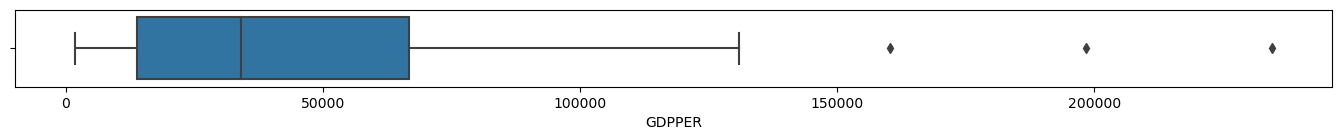

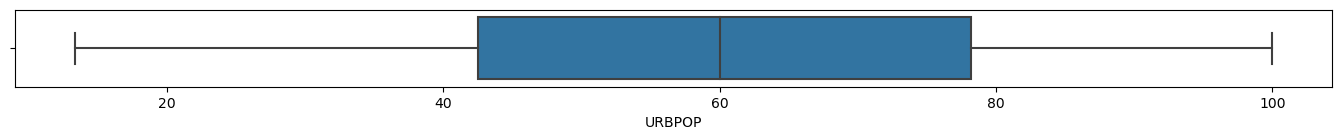

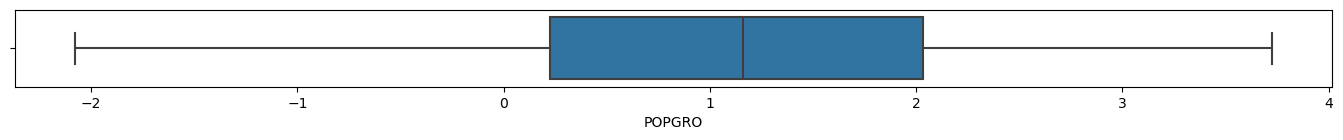

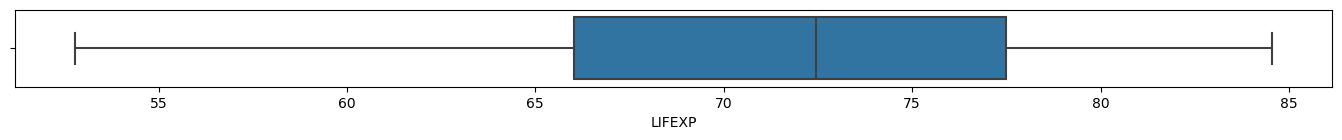

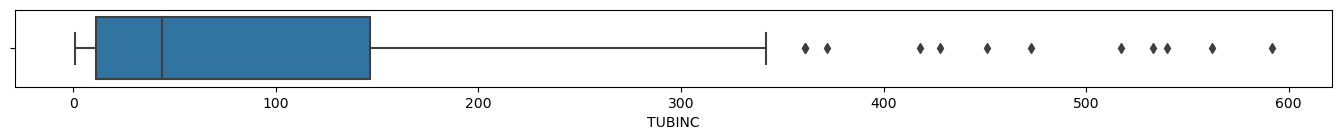

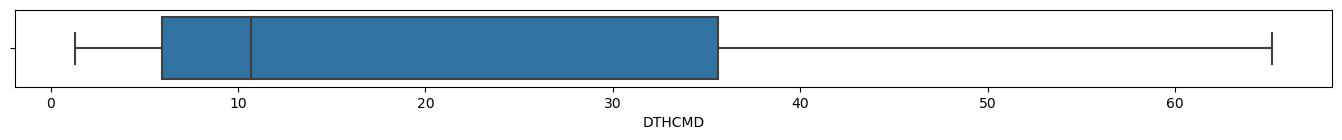

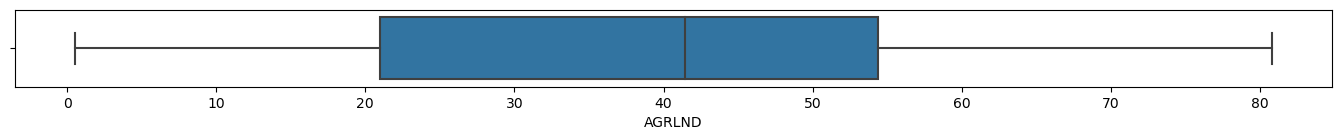

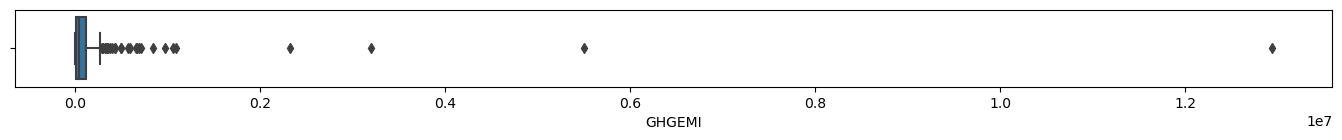

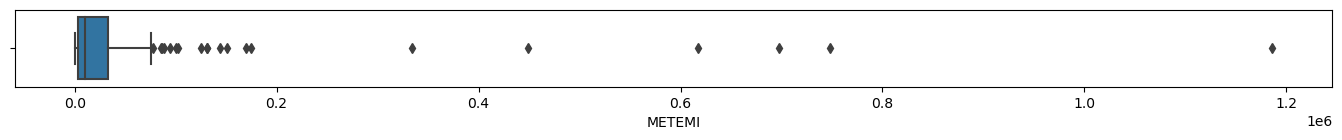

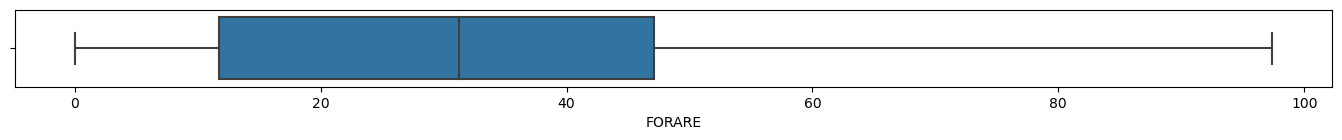

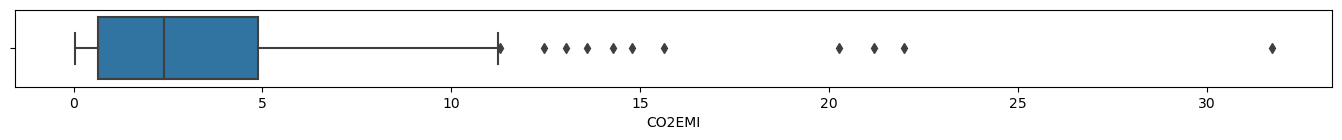

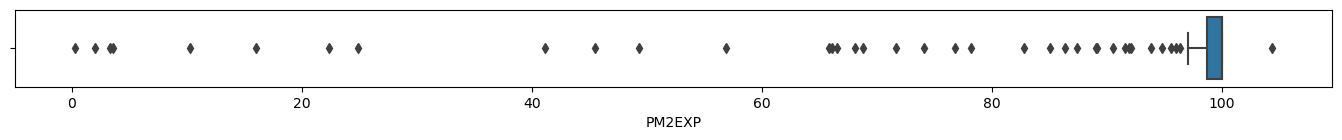

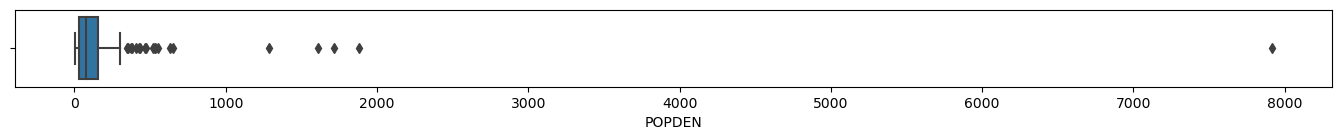

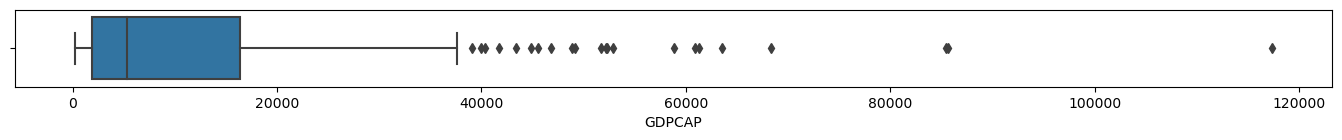

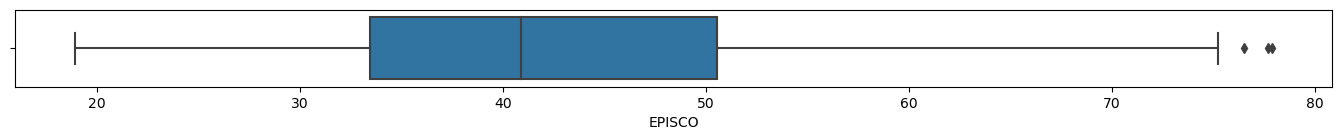

In [112]:
##################################
# Formulating the individual boxplots
# for all numeric columns
##################################
for column in cancer_rate_imputed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_imputed_numeric, x=column)

### 1.4.4 Collinearity <a class="anchor" id="1.4.4"></a>

[Pearson’s Correlation Coefficient](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) is a parametric measure of the linear correlation for a pair of features by calculating the ratio between their covariance and the product of their standard deviations. The presence of high absolute correlation values indicate the univariate association between the numeric predictors and the numeric response.

1. Majority of the numeric variables reported moderate to high correlation which were statistically significant.
2. Among pairwise combinations of numeric variables, high Pearson.Correlation.Coefficient values were noted for:
    * <span style="color: #FF0000">GDPPER</span> and <span style="color: #FF0000">GDPCAP</span>: Pearson.Correlation.Coefficient = +0.921
    * <span style="color: #FF0000">GHGEMI</span> and <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.905
3. Among the highly correlated pairs, variables with the lowest correlation against the target variable were removed.
    * <span style="color: #FF0000">GDPPER</span>: Pearson.Correlation.Coefficient = +0.690
    * <span style="color: #FF0000">METEMI</span>: Pearson.Correlation.Coefficient = +0.062
4. The cleaned dataset is comprised of:
    * **163 rows** (observations)
    * **16 columns** (variables)
        * **1/16 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/16 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **13/16 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">PM2EXP</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/16 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [113]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
def plot_correlation_matrix(corr, mask=None):
    f, ax = plt.subplots(figsize=(11, 9))
    sns.heatmap(corr, 
                ax=ax,
                mask=mask,
                annot=True, 
                vmin=-1, 
                vmax=1, 
                center=0,
                cmap='coolwarm', 
                linewidths=1, 
                linecolor='gray', 
                cbar_kws={'orientation': 'horizontal'})  

In [114]:
##################################
# Computing the correlation coefficients
# and correlation p-values
# among pairs of numeric columns
##################################
cancer_rate_imputed_numeric_correlation_pairs = {}
cancer_rate_imputed_numeric_columns = cancer_rate_imputed_numeric.columns.tolist()
for numeric_column_a, numeric_column_b in itertools.combinations(cancer_rate_imputed_numeric_columns, 2):
    cancer_rate_imputed_numeric_correlation_pairs[numeric_column_a + '_' + numeric_column_b] = stats.pearsonr(
        cancer_rate_imputed_numeric.loc[:, numeric_column_a], 
        cancer_rate_imputed_numeric.loc[:, numeric_column_b])

In [115]:
##################################
# Formulating the pairwise correlation summary
# for all numeric columns
##################################
cancer_rate_imputed_numeric_summary = cancer_rate_imputed_numeric.from_dict(cancer_rate_imputed_numeric_correlation_pairs, orient='index')
cancer_rate_imputed_numeric_summary.columns = ['Pearson.Correlation.Coefficient', 'Correlation.PValue']
display(cancer_rate_imputed_numeric_summary.sort_values(by=['Pearson.Correlation.Coefficient'], ascending=False).head(20))

,Pearson.Correlation.Coefficient,Correlation.PValue
GDPPER_GDPCAP,0.921010,8.158179e-68
GHGEMI_METEMI,0.905121,1.087643e-61
POPGRO_DTHCMD,0.759470,7.124695e-32
GDPPER_LIFEXP,0.755787,2.055178e-31
GDPCAP_EPISCO,0.696707,5.312642e-25
LIFEXP_GDPCAP,0.683834,8.321371e-24
GDPPER_EPISCO,0.680812,1.555304e-23
GDPPER_URBPOP,0.666394,2.781623e-22
GDPPER_CO2EMI,0.654958,2.450029e-21
TUBINC_DTHCMD,0.643615,1.936081e-20


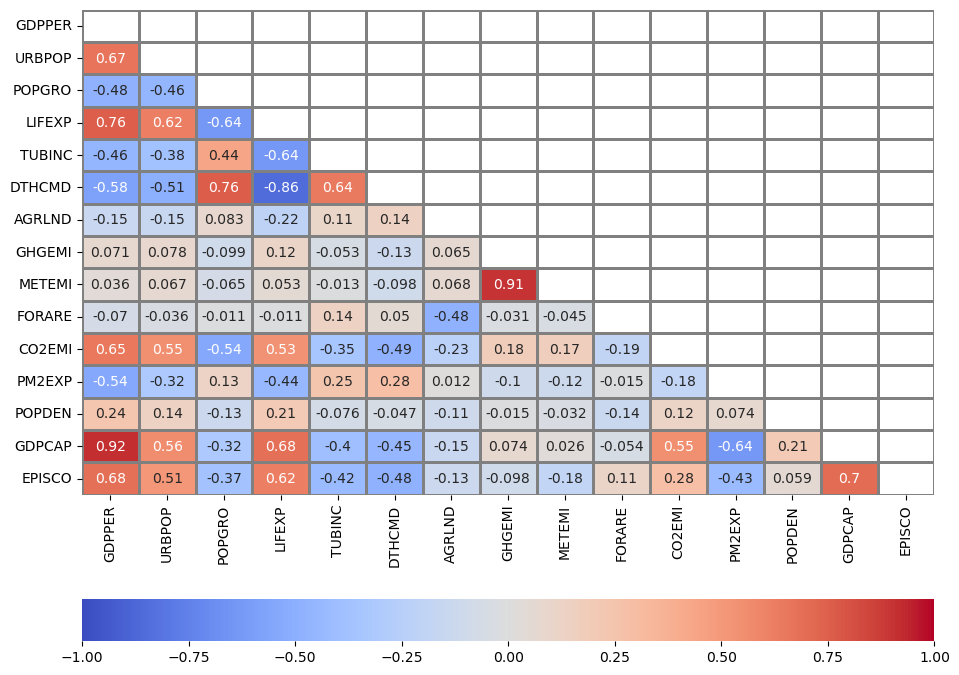

In [116]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
##################################
cancer_rate_imputed_numeric_correlation = cancer_rate_imputed_numeric.corr()
mask = np.triu(cancer_rate_imputed_numeric_correlation)
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)
plt.show()

In [117]:
##################################
# Formulating a function 
# to plot the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
def correlation_significance(df=None):
    p_matrix = np.zeros(shape=(df.shape[1],df.shape[1]))
    for col in df.columns:
        for col2 in df.drop(col,axis=1).columns:
            _ , p = stats.pearsonr(df[col],df[col2])
            p_matrix[df.columns.to_list().index(col),df.columns.to_list().index(col2)] = p
    return p_matrix

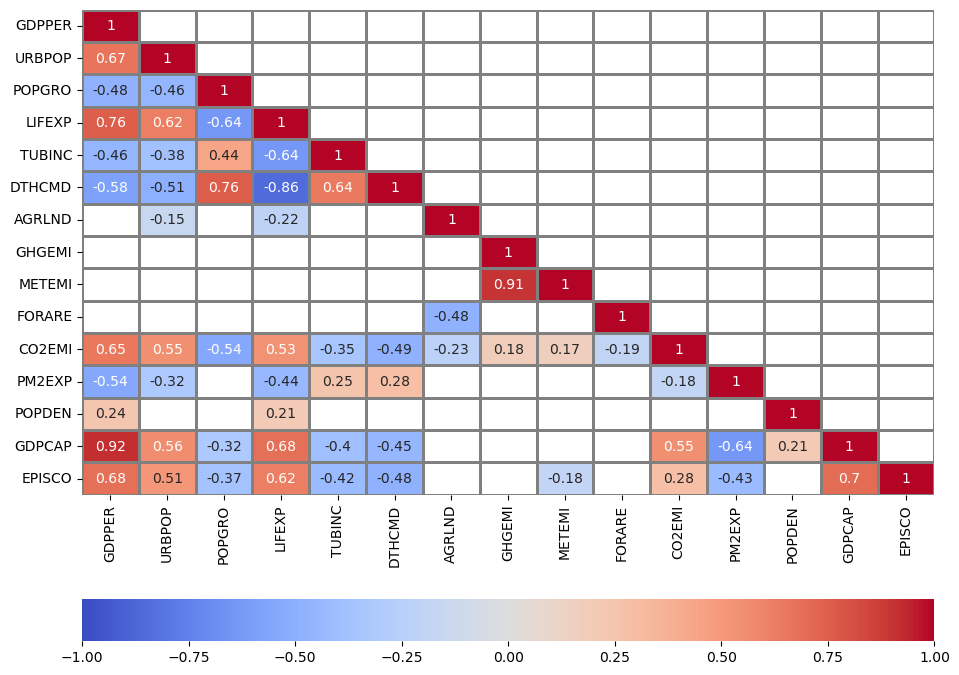

In [118]:
##################################
# Plotting the correlation matrix
# for all pairwise combinations
# of numeric columns
# with significant p-values only
##################################
cancer_rate_imputed_numeric_correlation_p_values = correlation_significance(cancer_rate_imputed_numeric)                     
mask = np.invert(np.tril(cancer_rate_imputed_numeric_correlation_p_values<0.05)) 
plot_correlation_matrix(cancer_rate_imputed_numeric_correlation,mask)  

In [119]:
##################################
# Filtering out one among the 
# highly correlated variable pairs with
# lesser Pearson.Correlation.Coefficient
# when compared to the target variable
##################################
cancer_rate_imputed_numeric.drop(['GDPPER','METEMI'], inplace=True, axis=1)

In [120]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_imputed_numeric.shape)

Dataset Dimensions: 


(163, 13)

### 1.4.5 Shape Transformation <a class="anchor" id="1.4.5"></a>

[Yeo-Johnson Transformation](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) applies a new family of distributions that can be used without restrictions, extending many of the good properties of the Box-Cox power family. Similar to the Box-Cox transformation, the method also estimates the optimal value of lambda but has the ability to transform both positive and negative values by inflating low variance data and deflating high variance data to create a more uniform data set. While there are no restrictions in terms of the applicable values, the interpretability of the transformed values is more diminished as compared to the other methods.

1. A Yeo-Johnson transformation was applied to all numeric variables to improve distributional shape.
2. Most variables achieved symmetrical distributions with minimal outliers after transformation.
3. One variable which remained skewed even after applying shape transformation was removed.
    * <span style="color: #FF0000">PM2EXP</span> 
4. The transformed dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [121]:
##################################
# Conducting a Yeo-Johnson Transformation
# to address the distributional
# shape of the variables
##################################
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson',
                                          standardize=False)
cancer_rate_imputed_numeric_array = yeo_johnson_transformer.fit_transform(cancer_rate_imputed_numeric)

In [122]:
##################################
# Formulating a new dataset object
# for the transformed data
##################################
cancer_rate_transformed_numeric = pd.DataFrame(cancer_rate_imputed_numeric_array,
                                               columns=cancer_rate_imputed_numeric.columns)

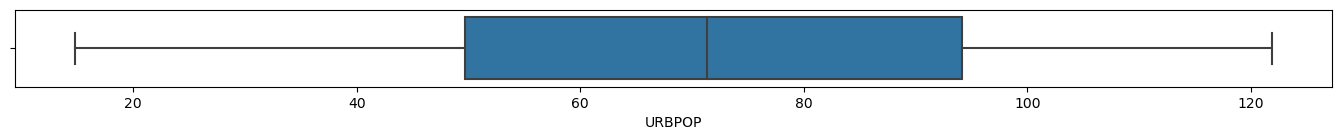

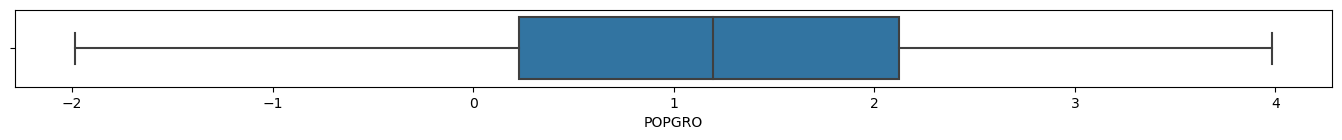

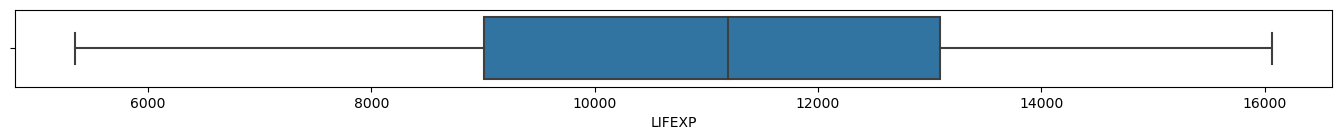

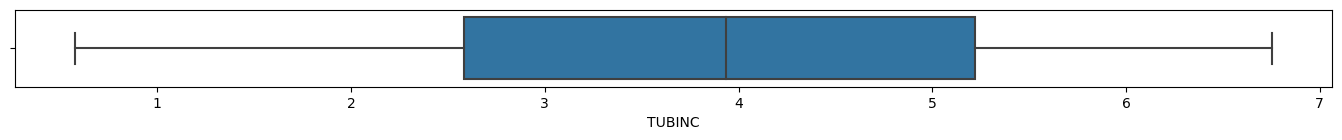

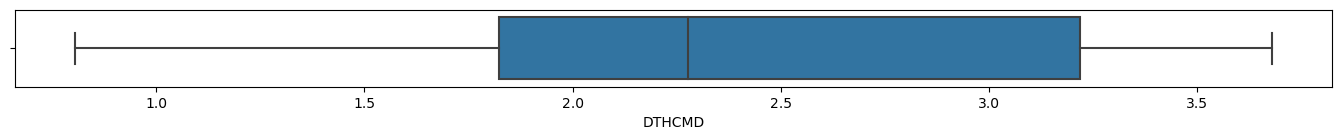

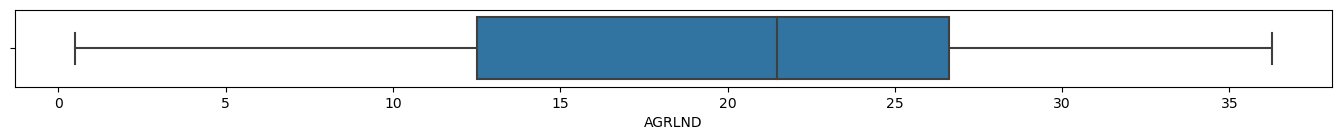

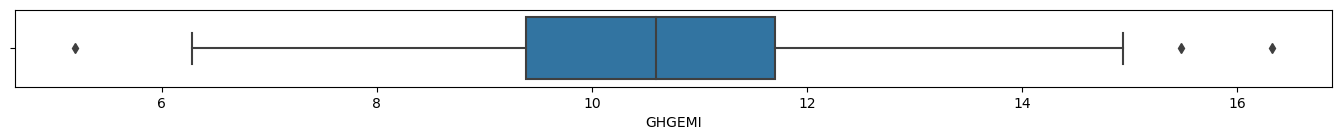

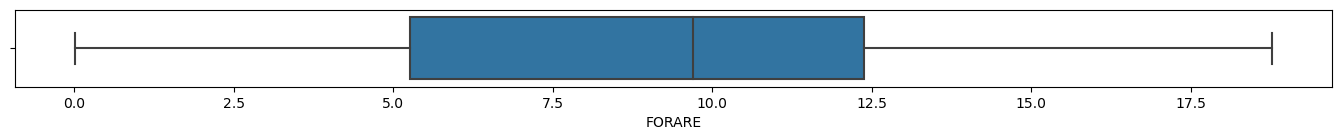

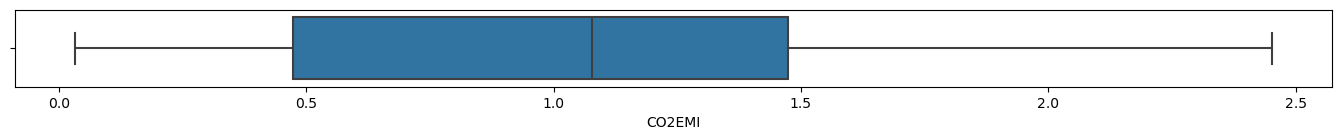

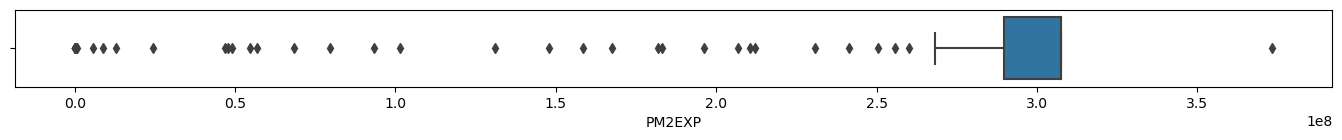

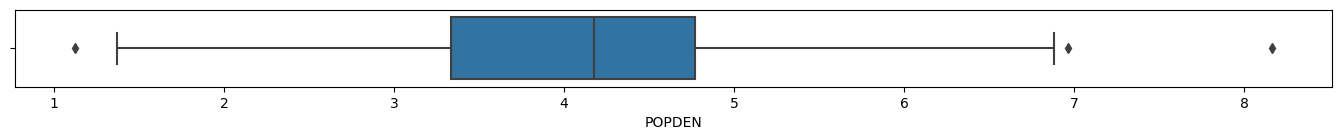

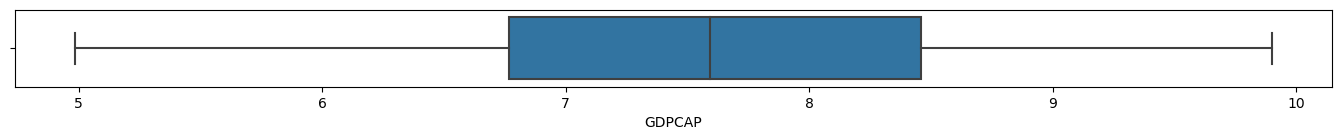

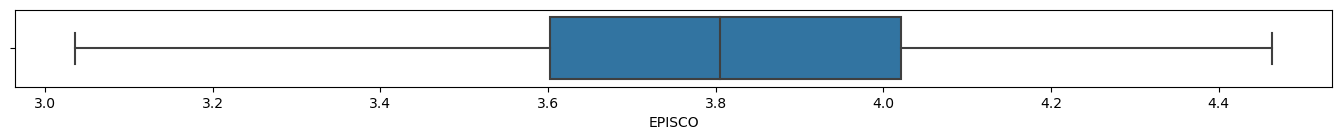

In [123]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_transformed_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_transformed_numeric, x=column)

In [124]:
##################################
# Filtering out the column
# which remained skewed even
# after applying shape transformation
##################################
cancer_rate_transformed_numeric.drop(['PM2EXP'], inplace=True, axis=1)

In [125]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_transformed_numeric.shape)

Dataset Dimensions: 


(163, 12)

### 1.4.6 Centering and Scaling <a class="anchor" id="1.4.6"></a>

1. All numeric variables were transformed using the standardization method to achieve a comparable scale between values.
4. The scaled dataset is comprised of:
    * **163 rows** (observations)
    * **15 columns** (variables)
        * **1/15 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/15 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/15 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **1/15 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT</span>

In [126]:
##################################
# Conducting standardization
# to transform the values of the 
# variables into comparable scale
##################################
standardization_scaler = StandardScaler()
cancer_rate_transformed_numeric_array = standardization_scaler.fit_transform(cancer_rate_transformed_numeric)

In [127]:
##################################
# Formulating a new dataset object
# for the scaled data
##################################
cancer_rate_scaled_numeric = pd.DataFrame(cancer_rate_transformed_numeric_array,
                                          columns=cancer_rate_transformed_numeric.columns)

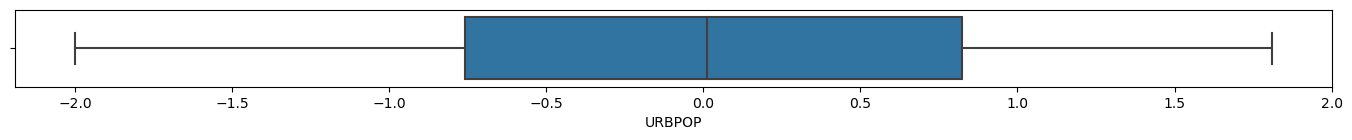

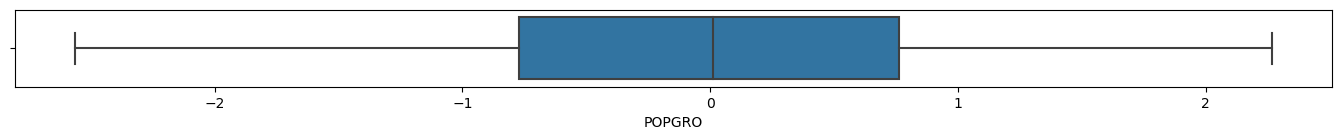

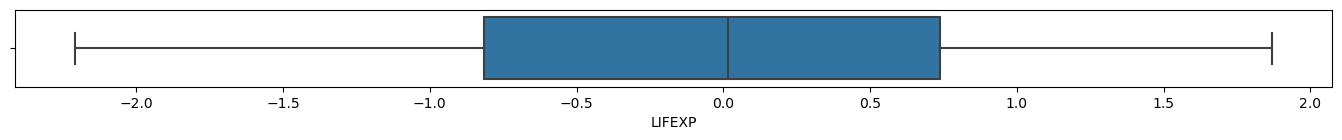

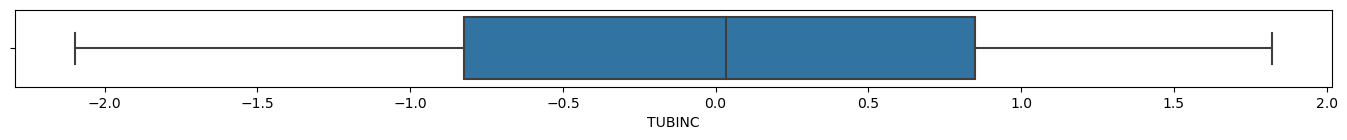

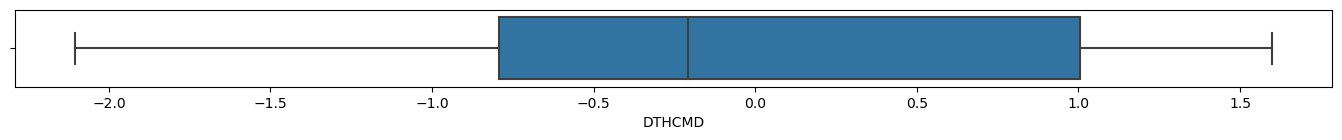

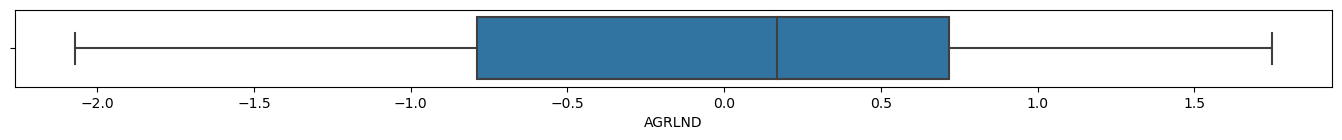

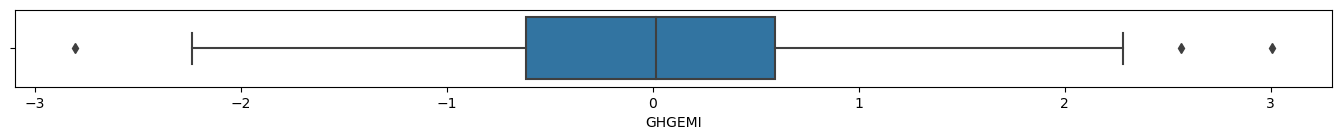

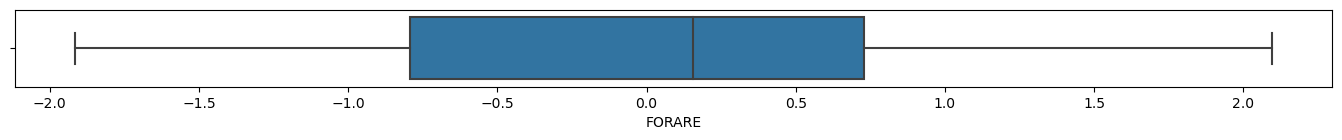

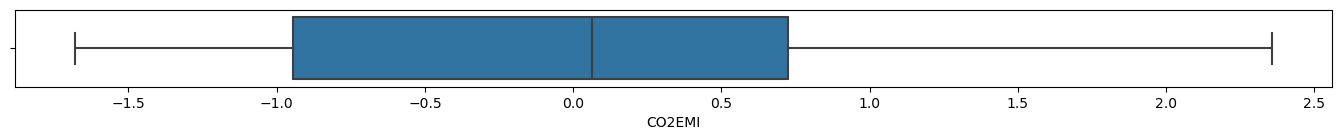

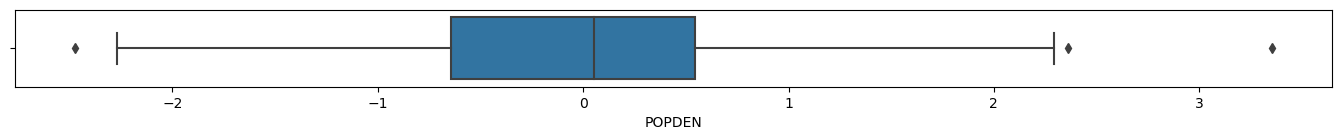

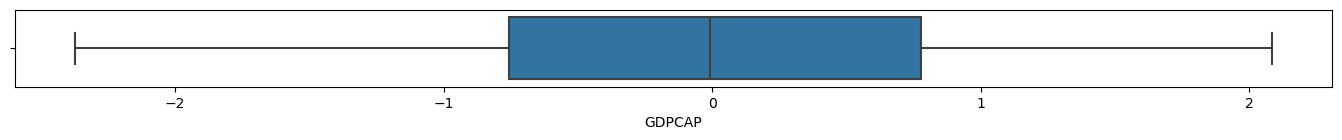

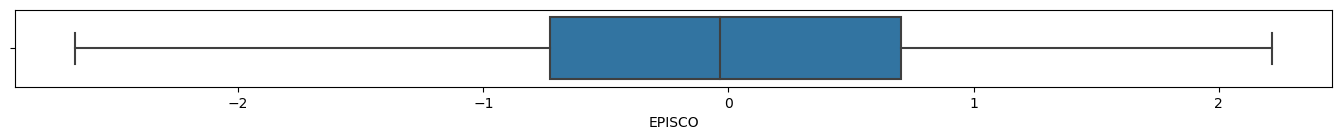

In [128]:
##################################
# Formulating the individual boxplots
# for all transformed numeric columns
##################################
for column in cancer_rate_scaled_numeric:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=cancer_rate_scaled_numeric, x=column)

### 1.4.7 Data Encoding <a class="anchor" id="1.4.7"></a>

1. One-hot encoding was applied to the <span style="color: #FF0000">HDICAP_VH</span> variable resulting to 4 additional columns in the dataset:
    * <span style="color: #FF0000">HDICAP_L</span>
    * <span style="color: #FF0000">HDICAP_M</span>
    * <span style="color: #FF0000">HDICAP_H</span>
    * <span style="color: #FF0000">HDICAP_VH</span>

In [129]:
##################################
# Formulating the categorical column
# for encoding transformation
##################################
cancer_rate_categorical_encoded = pd.DataFrame(cancer_rate_cleaned_categorical.loc[:, 'HDICAT'].to_list(),
                                               columns=['HDICAT'])

In [130]:
##################################
# Applying a one-hot encoding transformation
# for the categorical column
##################################
cancer_rate_categorical_encoded = pd.get_dummies(cancer_rate_categorical_encoded, columns=['HDICAT'])

### 1.4.8 Preprocessed Data Description <a class="anchor" id="1.4.8"></a>

1. The preprocessed dataset is comprised of:
    * **163 rows** (observations)
    * **18 columns** (variables)
        * **1/18 metadata** (object)
            * <span style="color: #FF0000">COUNTRY</span>
        * **1/18 target** (categorical)
             * <span style="color: #FF0000">CANRAT</span>
        * **12/18 predictor** (numeric)
             * <span style="color: #FF0000">URBPOP</span>
             * <span style="color: #FF0000">POPGRO</span>
             * <span style="color: #FF0000">LIFEXP</span>
             * <span style="color: #FF0000">TUBINC</span>
             * <span style="color: #FF0000">DTHCMD</span>
             * <span style="color: #FF0000">AGRLND</span>
             * <span style="color: #FF0000">GHGEMI</span>
             * <span style="color: #FF0000">FORARE</span>
             * <span style="color: #FF0000">CO2EMI</span>
             * <span style="color: #FF0000">POPDEN</span>
             * <span style="color: #FF0000">GDPCAP</span>
             * <span style="color: #FF0000">EPISCO</span>
        * **4/18 predictor** (categorical)
             * <span style="color: #FF0000">HDICAT_L</span>
             * <span style="color: #FF0000">HDICAT_M</span>
             * <span style="color: #FF0000">HDICAT_H</span>
             * <span style="color: #FF0000">HDICAT_VH</span>

In [131]:
##################################
# Consolidating both numeric columns
# and encoded categorical columns
##################################
cancer_rate_preprocessed = pd.concat([cancer_rate_scaled_numeric,cancer_rate_categorical_encoded], axis=1, join='inner')  

In [132]:
##################################
# Performing a general exploration of the consolidated dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_preprocessed.shape)

Dataset Dimensions: 


(163, 16)

## 1.5. Data Exploration <a class="anchor" id="1.5"></a>

### 1.5.1 Exploratory Data Analysis <a class="anchor" id="1.5.1"></a>

1. Bivariate analysis identified individual predictors with generally positive association to the target variable based on visual inspection.
2. Higher values or higher proportions for the following predictors are associated with the <span style="color: #FF0000">CANRAT</span> HIGH category: 
    * <span style="color: #FF0000">URBPOP</span>
    * <span style="color: #FF0000">LIFEXP</span>    
    * <span style="color: #FF0000">CO2EMI</span>    
    * <span style="color: #FF0000">GDPCAP</span>    
    * <span style="color: #FF0000">EPISCO</span>    
    * <span style="color: #FF0000">HDICAP_VH=1</span>
3. Decreasing values or smaller proportions for the following predictors are associated with the <span style="color: #FF0000">CANRAT</span> LOW category: 
    * <span style="color: #FF0000">POPGRO</span>
    * <span style="color: #FF0000">TUBINC</span>    
    * <span style="color: #FF0000">DTHCMD</span> 
    * <span style="color: #FF0000">HDICAP_L=0</span>
    * <span style="color: #FF0000">HDICAP_M=0</span>
    * <span style="color: #FF0000">HDICAP_H=0</span>
4. Values for the following predictors are not associated with the <span style="color: #FF0000">CANRAT</span>  HIGH or LOW categories: 
    * <span style="color: #FF0000">AGRLND</span>
    * <span style="color: #FF0000">GHGEMI</span>    
    * <span style="color: #FF0000">FORARE</span> 
    * <span style="color: #FF0000">POPDEN</span> 

In [133]:
##################################
# Segregating the target
# and predictor variable lists
##################################
cancer_rate_preprocessed_target = cancer_rate_filtered_row['CANRAT'].to_frame()
cancer_rate_preprocessed_target.reset_index(inplace=True, drop=True)
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed[cancer_rate_categorical_encoded.columns]
cancer_rate_preprocessed_categorical_combined = cancer_rate_preprocessed_categorical.join(cancer_rate_preprocessed_target)
cancer_rate_preprocessed = cancer_rate_preprocessed.drop(cancer_rate_categorical_encoded.columns, axis=1) 
cancer_rate_preprocessed_predictors = cancer_rate_preprocessed.columns
cancer_rate_preprocessed_combined = cancer_rate_preprocessed.join(cancer_rate_preprocessed_target)
cancer_rate_preprocessed_all = cancer_rate_preprocessed_combined.join(cancer_rate_categorical_encoded)

In [134]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variable = 'CANRAT'
x_variables = cancer_rate_preprocessed_predictors

In [135]:
##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 6
num_cols = 2

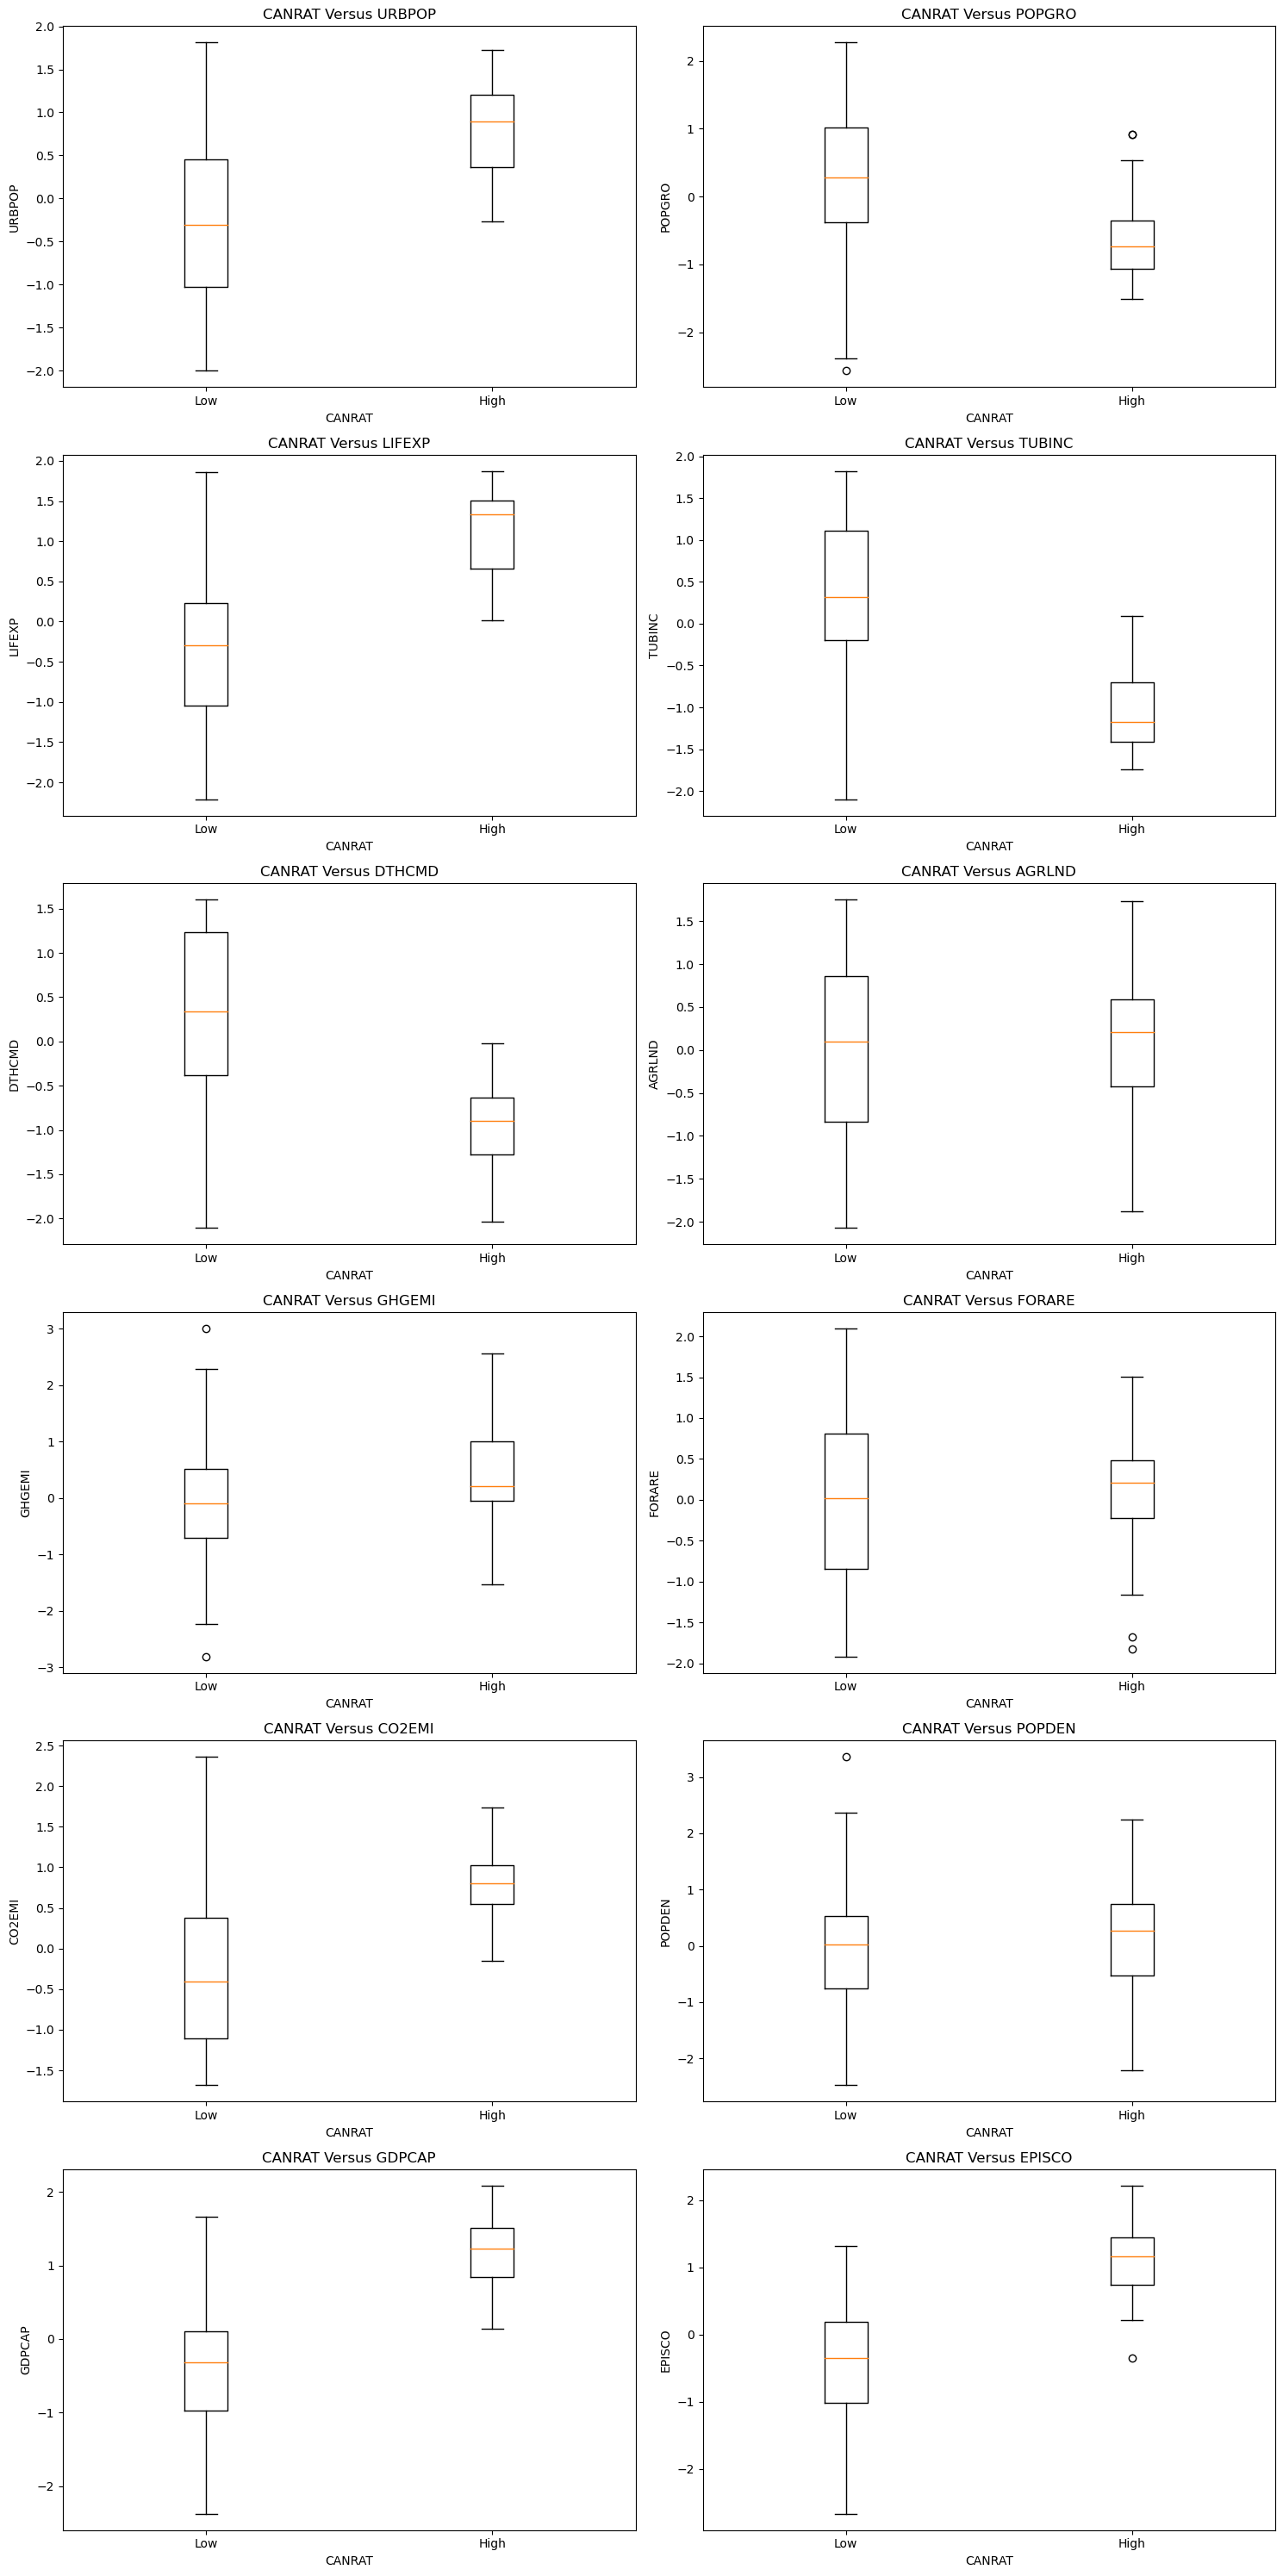

In [136]:
##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 30))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual boxplots
# for all scaled numeric columns
##################################
for i, x_variable in enumerate(x_variables):
    ax = axes[i]
    ax.boxplot([group[x_variable] for name, group in cancer_rate_preprocessed_combined.groupby(y_variable)])
    ax.set_title(f'{y_variable} Versus {x_variable}')
    ax.set_xlabel(y_variable)
    ax.set_ylabel(x_variable)
    ax.set_xticks(range(1, len(cancer_rate_preprocessed_combined[y_variable].unique()) + 1), ['Low', 'High'])

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

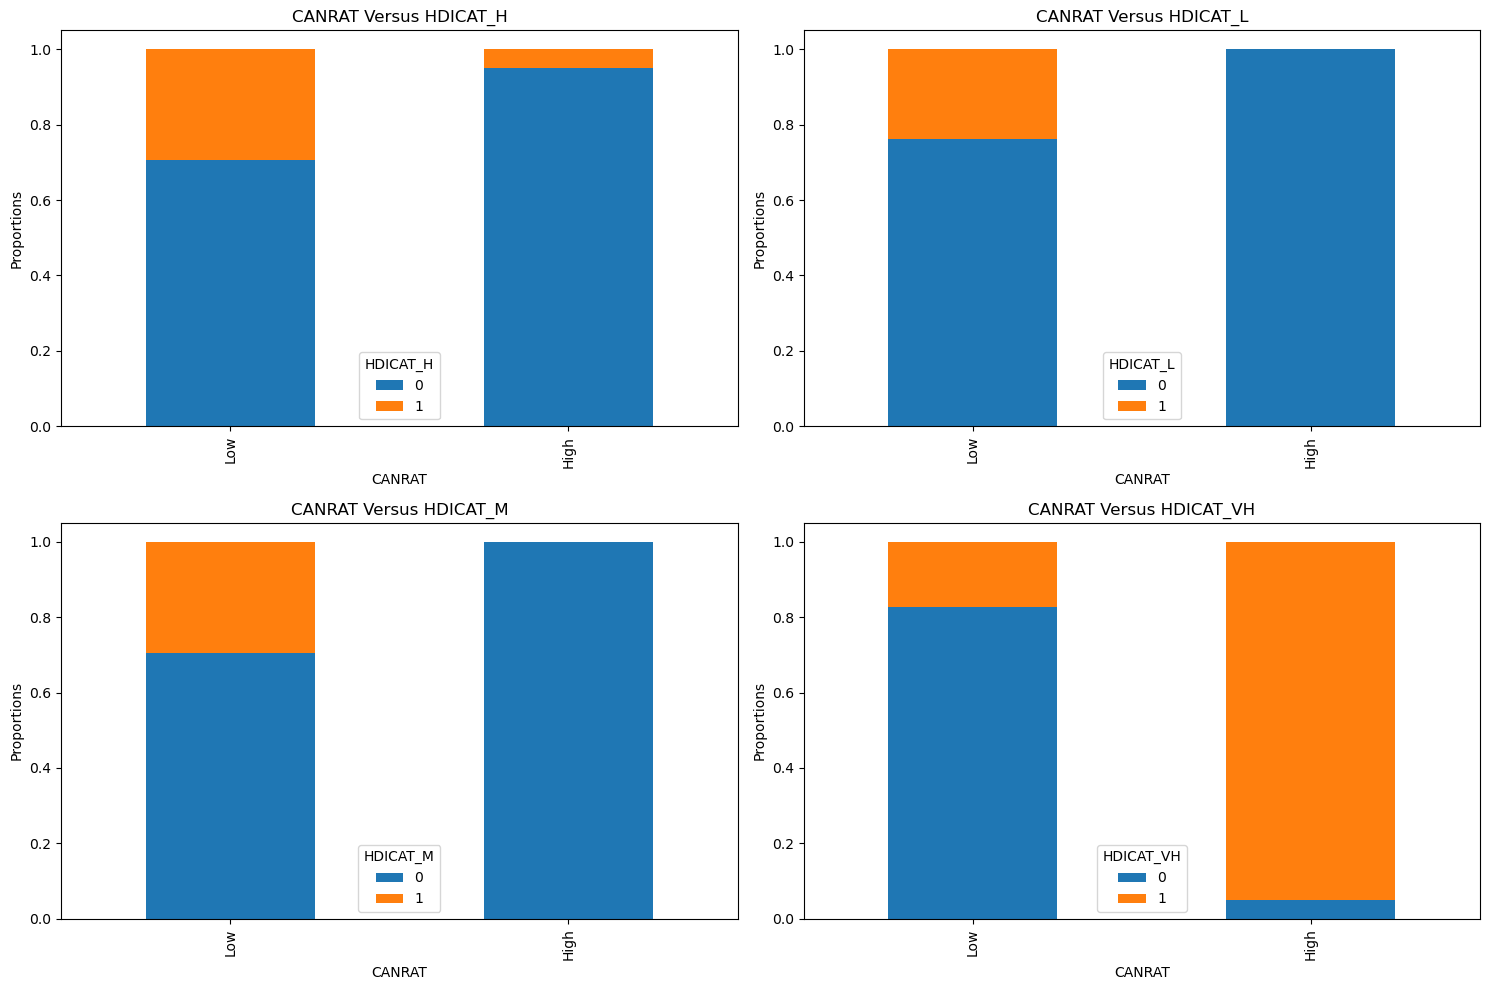

In [137]:
##################################
# Segregating the target
# and predictor variable names
##################################
y_variables = cancer_rate_preprocessed_categorical.columns
x_variable = 'CANRAT'

##################################
# Defining the number of 
# rows and columns for the subplots
##################################
num_rows = 2
num_cols = 2

##################################
# Formulating the subplot structure
##################################
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

##################################
# Flattening the multi-row and
# multi-column axes
##################################
axes = axes.ravel()

##################################
# Formulating the individual stacked column plots
# for all categorical columns
##################################
for i, y_variable in enumerate(y_variables):
    ax = axes[i]
    category_counts = cancer_rate_preprocessed_categorical_combined.groupby([x_variable, y_variable]).size().unstack(fill_value=0)
    category_proportions = category_counts.div(category_counts.sum(axis=1), axis=0)
    category_proportions.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{x_variable} Versus {y_variable}')
    ax.set_xlabel(x_variable)
    ax.set_ylabel('Proportions')

##################################
# Adjusting the subplot layout
##################################
plt.tight_layout()

##################################
# Presenting the subplots
##################################
plt.show()

### 1.5.2 Hypothesis Testing <a class="anchor" id="1.5.2"></a>

1. The relationship between the numeric predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: Difference in the means between groups LOW and HIGH is equal to zero  
    * **Alternative**: Difference in the means between groups LOW and HIGH is not equal to zero   
2. There is sufficient evidence to conclude of a statistically significant difference between the means of the numeric measurements obtained from LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable in 9 of the 12 numeric predictors given their high t-test statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">GDPCAP</span>: T.Test.Statistic=-11.937, Correlation.PValue=0.000
    * <span style="color: #FF0000">EPISCO</span>: T.Test.Statistic=-11.789, Correlation.PValue=0.000 
    * <span style="color: #FF0000">LIFEXP</span>: T.Test.Statistic=-10.979, Correlation.PValue=0.000  
    * <span style="color: #FF0000">TUBINC</span>: T.Test.Statistic=+9.609, Correlation.PValue=0.000 
    * <span style="color: #FF0000">DTHCMD</span>: T.Test.Statistic=+8.376, Correlation.PValue=0.000 
    * <span style="color: #FF0000">CO2EMI</span>: T.Test.Statistic=-7.031, Correlation.PValue=0.000  
    * <span style="color: #FF0000">URBPOP</span>: T.Test.Statistic=-6.541, Correlation.PValue=0.000   
    * <span style="color: #FF0000">POPGRO</span>: T.Test.Statistic=+4.905, Correlation.PValue=0.000
    * <span style="color: #FF0000">GHGEMI</span>: T.Test.Statistic=-2.243, Correlation.PValue=0.026
3. The relationship between the categorical predictors to the <span style="color: #FF0000">CANRAT</span> target variable was statistically evaluated using the following hypotheses:
    * **Null**: The categorical predictor is independent of the categorical target variable 
    * **Alternative**: The categorical predictor is dependent of the categorical target variable    
2. There is sufficient evidence to conclude of a statistically significant relationship difference between the categories of the categorical predictors and the LOW and HIGH groups of the <span style="color: #FF0000">CANRAT</span> target variable in all 4 categorical predictors given their high chisquare statistic values with reported low p-values less than the significance level of 0.05.
    * <span style="color: #FF0000">HDICAT_VH</span>: ChiSquare.Test.Statistic=76.764, ChiSquare.Test.PValue=0.000
    * <span style="color: #FF0000">HDICAT_H</span>: ChiSquare.Test.Statistic=13.860, ChiSquare.Test.PValue=0.000   
    * <span style="color: #FF0000">HDICAT_M</span>: ChiSquare.Test.Statistic=10.286, ChiSquare.Test.PValue=0.001 
    * <span style="color: #FF0000">HDICAT_L</span>: ChiSquare.Test.Statistic=9.081, ChiSquare.Test.PValue=0.002

In [138]:
##################################
# Computing the t-test 
# statistic and p-values
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_ttest_target = {}
cancer_rate_preprocessed_numeric = cancer_rate_preprocessed_combined
cancer_rate_preprocessed_numeric_columns = cancer_rate_preprocessed_predictors
for numeric_column in cancer_rate_preprocessed_numeric_columns:
    group_0 = cancer_rate_preprocessed_numeric[cancer_rate_preprocessed_numeric.loc[:,'CANRAT']=='Low']
    group_1 = cancer_rate_preprocessed_numeric[cancer_rate_preprocessed_numeric.loc[:,'CANRAT']=='High']
    cancer_rate_preprocessed_numeric_ttest_target['CANRAT_' + numeric_column] = stats.ttest_ind(
        group_0[numeric_column], 
        group_1[numeric_column], 
        equal_var=True)

In [139]:
##################################
# Formulating the pairwise ttest summary
# between the target variable
# and numeric predictor columns
##################################
cancer_rate_preprocessed_numeric_summary = cancer_rate_preprocessed_numeric.from_dict(cancer_rate_preprocessed_numeric_ttest_target, orient='index')
cancer_rate_preprocessed_numeric_summary.columns = ['T.Test.Statistic', 'T.Test.PValue']
display(cancer_rate_preprocessed_numeric_summary.sort_values(by=['T.Test.PValue'], ascending=True).head(12))

,T.Test.Statistic,T.Test.PValue
CANRAT_GDPCAP,-11.936988,6.247937e-24
CANRAT_EPISCO,-11.788870,1.605980e-23
CANRAT_LIFEXP,-10.979098,2.754214e-21
CANRAT_TUBINC,9.608760,1.463678e-17
CANRAT_DTHCMD,8.375558,2.552108e-14
CANRAT_CO2EMI,-7.030702,5.537463e-11
CANRAT_URBPOP,-6.541001,7.734940e-10
CANRAT_POPGRO,4.904817,2.269446e-06
CANRAT_GHGEMI,-2.243089,2.625563e-02
CANRAT_FORARE,-1.174143,2.420717e-01


In [140]:
##################################
# Computing the chisquare
# statistic and p-values
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_chisquare_target = {}
cancer_rate_preprocessed_categorical = cancer_rate_preprocessed_categorical_combined
cancer_rate_preprocessed_categorical_columns = ['HDICAT_L','HDICAT_M','HDICAT_H','HDICAT_VH']
for categorical_column in cancer_rate_preprocessed_categorical_columns:
    contingency_table = pd.crosstab(cancer_rate_preprocessed_categorical[categorical_column], 
                                    cancer_rate_preprocessed_categorical['CANRAT'])
    cancer_rate_preprocessed_categorical_chisquare_target['CANRAT_' + categorical_column] = stats.chi2_contingency(
        contingency_table)[0:2]

In [141]:
##################################
# Formulating the pairwise chisquare summary
# between the target variable
# and categorical predictor columns
##################################
cancer_rate_preprocessed_categorical_summary = cancer_rate_preprocessed_categorical.from_dict(cancer_rate_preprocessed_categorical_chisquare_target, orient='index')
cancer_rate_preprocessed_categorical_summary.columns = ['ChiSquare.Test.Statistic', 'ChiSquare.Test.PValue']
display(cancer_rate_preprocessed_categorical_summary.sort_values(by=['ChiSquare.Test.PValue'], ascending=True).head(4))

,ChiSquare.Test.Statistic,ChiSquare.Test.PValue
CANRAT_HDICAT_VH,76.764134,1.926446e-18
CANRAT_HDICAT_M,13.860367,1.969074e-04
CANRAT_HDICAT_L,10.285575,1.340742e-03
CANRAT_HDICAT_H,9.080788,2.583087e-03


## 1.6. Model Development With Hyperparameter Tuning <a class="anchor" id="1.6"></a>

[Hyperparameter tuning](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) is an iterative process that involves experimenting with different hyperparameter combinations, evaluating the model's performance, and refining the hyperparameter values to achieve the best possible performance on new, unseen data - aimed at building effective and well-generalizing machine learning models. A model's performance depends not only on the learned parameters (weights) during training but also on hyperparameters, which are external configuration settings that cannot be learned from the data. 


### 1.6.1 Premodelling Data Description <a class="anchor" id="1.6.1"></a>

In [142]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [143]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

Dataset Dimensions: 


(163, 9)

In [144]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

Column Names and Data Types:


URBPOP        float64
LIFEXP        float64
TUBINC        float64
DTHCMD        float64
CO2EMI        float64
GDPCAP        float64
EPISCO        float64
CANRAT       category
HDICAT_VH       uint8
dtype: object

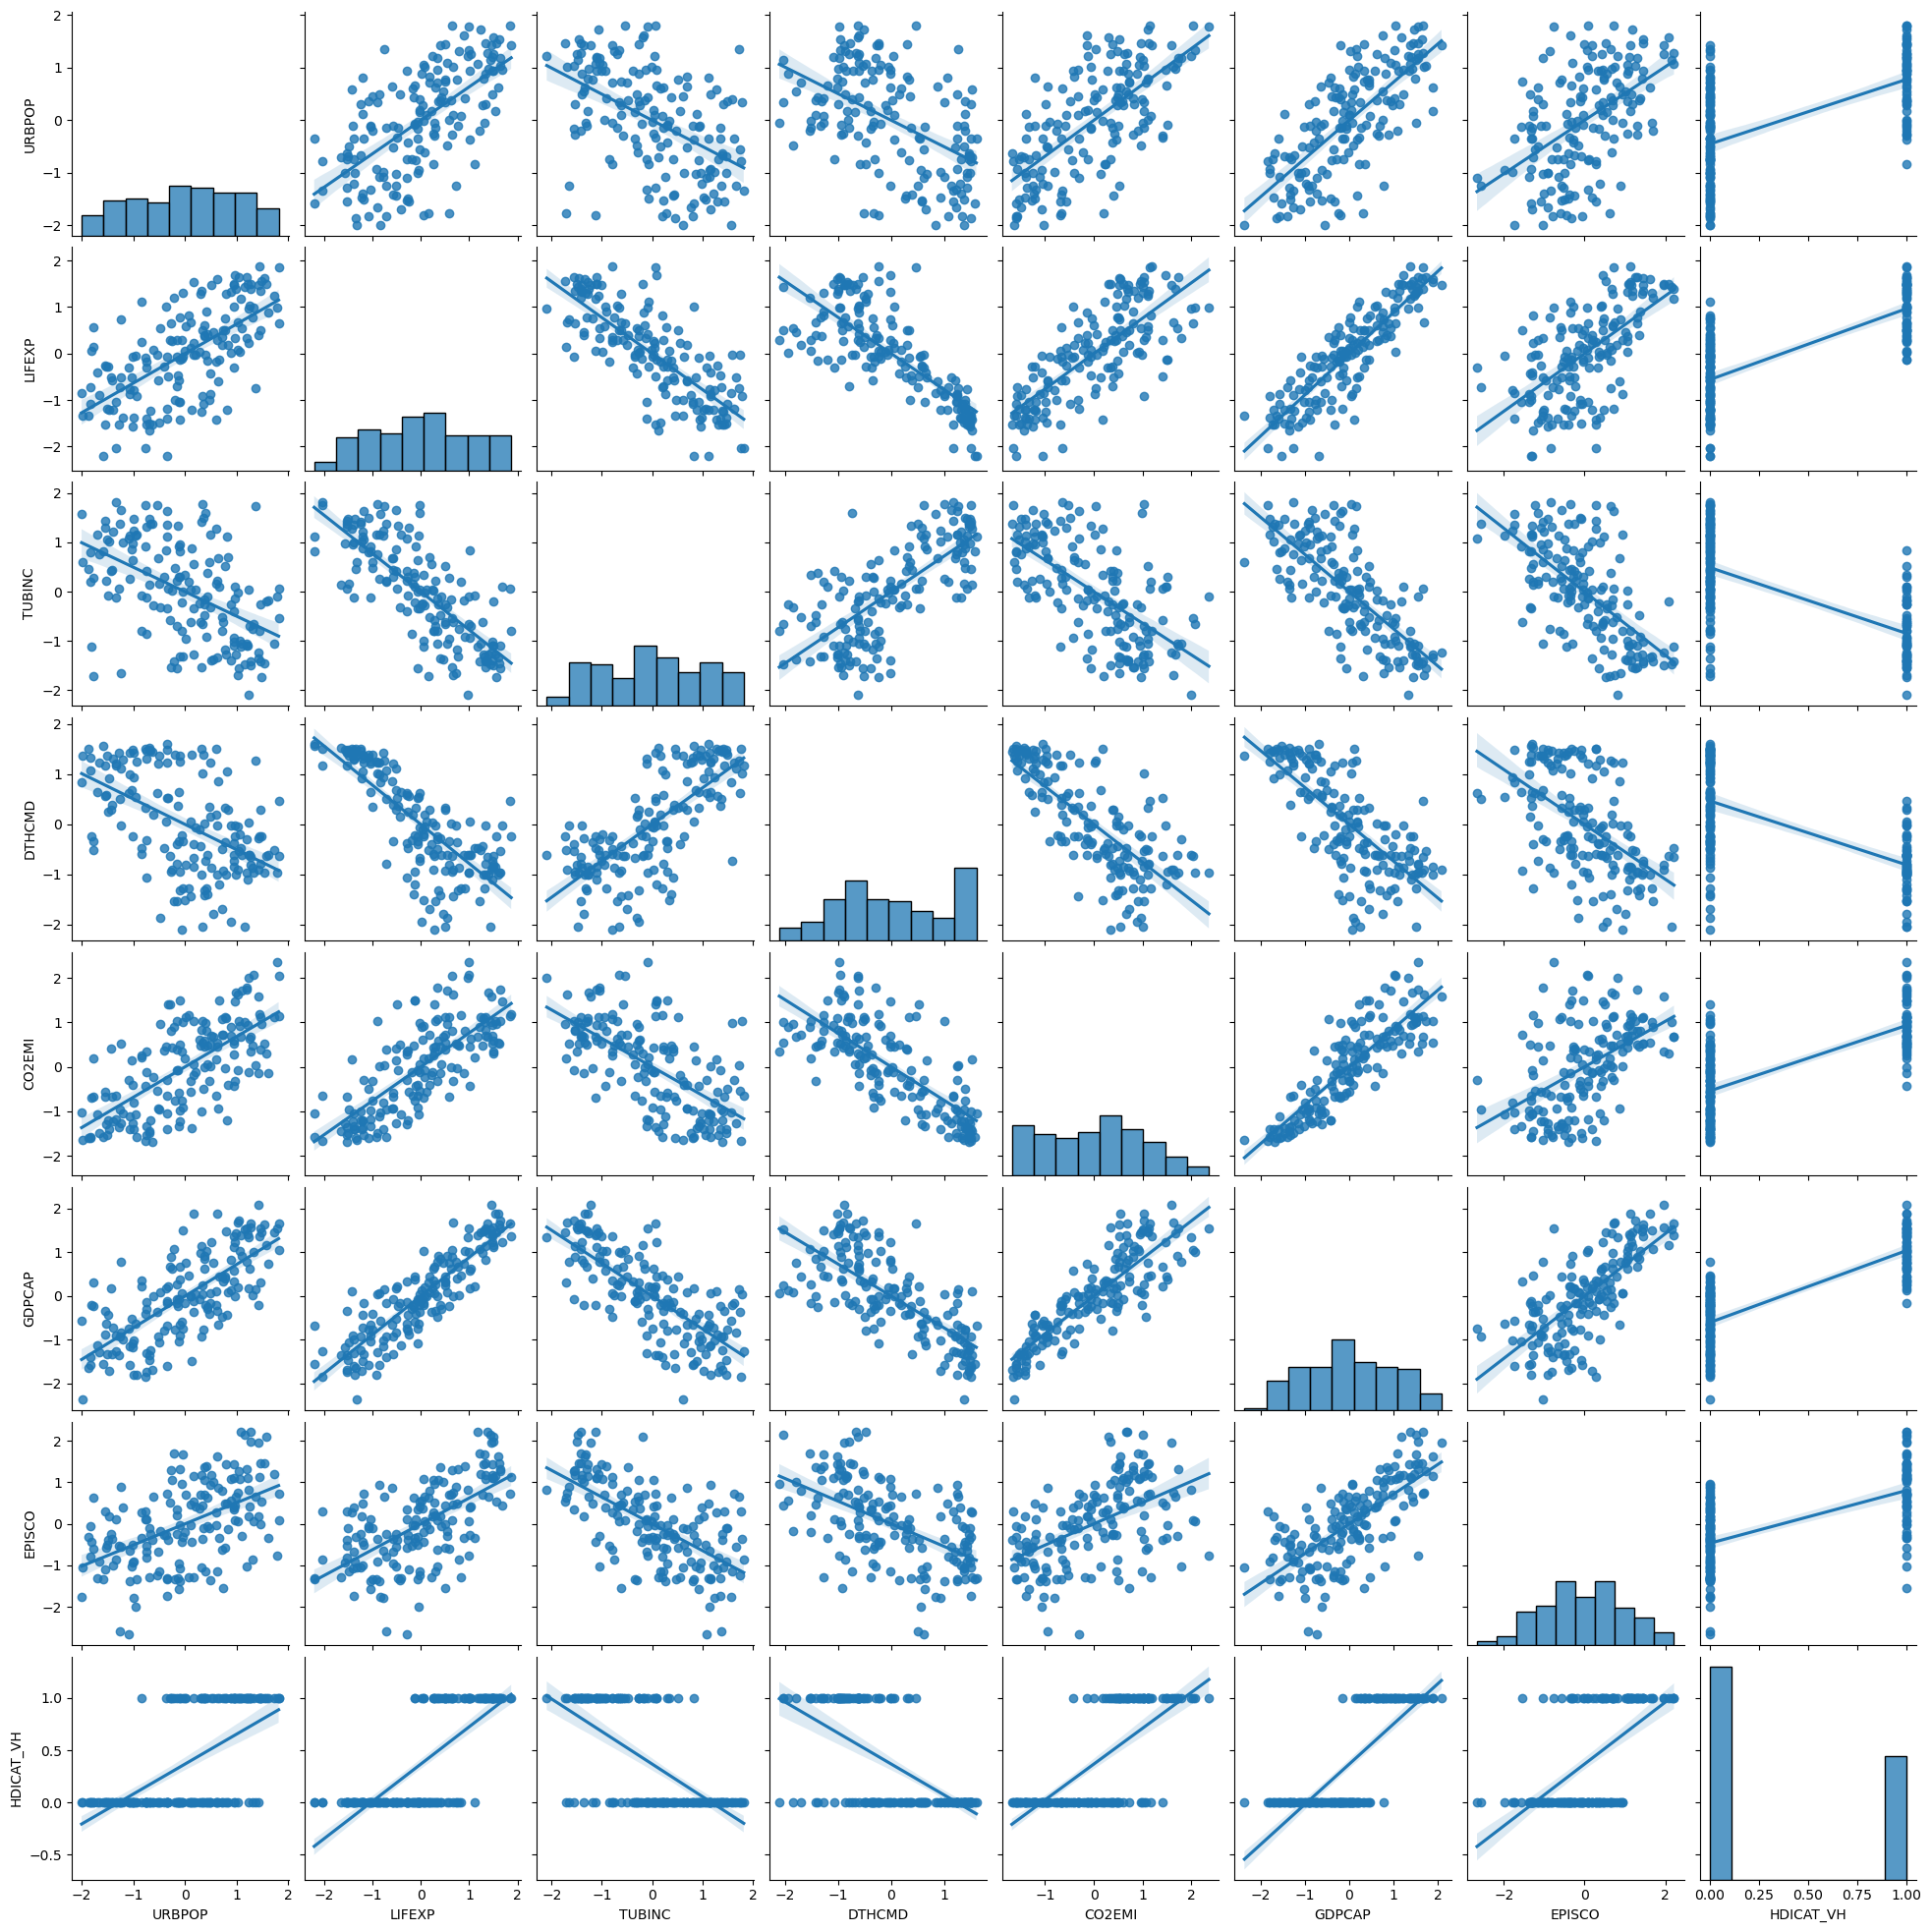

In [145]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling, kind='reg')
plt.show()

In [146]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [147]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [148]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

Dataset Dimensions: 


(114, 8)

In [149]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

0    0.745614
1    0.254386
dtype: float64

In [150]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

Dataset Dimensions: 


(49, 8)

In [151]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

0    0.755102
1    0.244898
dtype: float64

In [152]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.6.2 Logistic Regression <a class="anchor" id="1.6.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

In [153]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
optimal_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Logistic Regression model
##################################
optimal_logistic_regression.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Logistic Regression model
##################################
optimal_logistic_regression.best_score_ 
optimal_logistic_regression.best_params_

{'C': 1.0,
 'class_weight': None,
 'penalty': 'l1',
 'random_state': 88888888,
 'solver': 'liblinear'}

In [154]:
##################################
# Evaluating the optimal logistic regression model
# on the train set
##################################
optimal_logistic_regression_y_hat_train = optimal_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_logistic_regression_performance_train = model_performance_evaluation(y_train, optimal_logistic_regression_y_hat_train)
optimal_logistic_regression_performance_train['model'] = ['optimal_logistic_regression'] * 5
optimal_logistic_regression_performance_train['set'] = ['train'] * 5
print('Optimal Logistic Regression Model Performance on Train Data: ')
display(optimal_logistic_regression_performance_train)

Optimal Logistic Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.947368,optimal_logistic_regression,train
1,Precision,0.870968,optimal_logistic_regression,train
2,Recall,0.931034,optimal_logistic_regression,train
3,F1,0.900000,optimal_logistic_regression,train
4,AUROC,0.941988,optimal_logistic_regression,train


In [155]:
##################################
# Evaluating the optimal logistic regression model
# on the test set
##################################
optimal_logistic_regression_y_hat_test = optimal_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_logistic_regression_performance_test = model_performance_evaluation(y_test, optimal_logistic_regression_y_hat_test)
optimal_logistic_regression_performance_test['model'] = ['optimal_logistic_regression'] * 5
optimal_logistic_regression_performance_test['set'] = ['test'] * 5
print('Optimal Logistic Regression Model Performance on Test Data: ')
display(optimal_logistic_regression_performance_test)

Optimal Logistic Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.897959,optimal_logistic_regression,test
1,Precision,0.888889,optimal_logistic_regression,test
2,Recall,0.666667,optimal_logistic_regression,test
3,F1,0.761905,optimal_logistic_regression,test
4,AUROC,0.819820,optimal_logistic_regression,test


### 1.6.3 Decision Trees <a class="anchor" id="1.6.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

In [156]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
optimal_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Decision Tree model
##################################
optimal_decision_tree.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Decision Tree model
##################################
optimal_decision_tree.best_score_ 
optimal_decision_tree.best_params_

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'random_state': 88888888}

In [157]:
##################################
# Evaluating the optimal decision tree model
# on the train set
##################################
optimal_decision_tree_y_hat_train = optimal_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_decision_tree_performance_train = model_performance_evaluation(y_train, optimal_decision_tree_y_hat_train)
optimal_decision_tree_performance_train['model'] = ['optimal_decision_tree'] * 5
optimal_decision_tree_performance_train['set'] = ['train'] * 5
print('Optimal Decision Tree Model Performance on Train Data: ')
display(optimal_decision_tree_performance_train)

Optimal Decision Tree Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.973684,optimal_decision_tree,train
1,Precision,1.000000,optimal_decision_tree,train
2,Recall,0.896552,optimal_decision_tree,train
3,F1,0.945455,optimal_decision_tree,train
4,AUROC,0.948276,optimal_decision_tree,train


In [158]:
##################################
# Evaluating the optimal decision tree model
# on the test set
##################################
optimal_decision_tree_y_hat_test = optimal_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_decision_tree_performance_test = model_performance_evaluation(y_test, optimal_decision_tree_y_hat_test)
optimal_decision_tree_performance_test['model'] = ['optimal_decision_tree'] * 5
optimal_decision_tree_performance_test['set'] = ['test'] * 5
print('Optimal Decision Tree Model Performance on Test Data: ')
display(optimal_decision_tree_performance_test)

Optimal Decision Tree Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.857143,optimal_decision_tree,test
1,Precision,0.857143,optimal_decision_tree,test
2,Recall,0.500000,optimal_decision_tree,test
3,F1,0.631579,optimal_decision_tree,test
4,AUROC,0.736486,optimal_decision_tree,test


### 1.6.4 Random Forest <a class="anchor" id="1.6.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

In [159]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [3,5,7],
    'max_features':['sqrt', 'log2'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
optimal_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Random Forest model
##################################
optimal_random_forest.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Random Forest model
##################################
optimal_random_forest.best_score_ 
optimal_random_forest.best_params_

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'n_estimators': 7,
 'random_state': 88888888}

In [160]:
##################################
# Evaluating the optimal Random Forest model
# on the train set
##################################
optimal_random_forest_y_hat_train = optimal_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_random_forest_performance_train = model_performance_evaluation(y_train, optimal_random_forest_y_hat_train)
optimal_random_forest_performance_train['model'] = ['optimal_random_forest'] * 5
optimal_random_forest_performance_train['set'] = ['train'] * 5
print('Optimal Random Forest Model Performance on Train Data: ')
display(optimal_random_forest_performance_train)

Optimal Random Forest Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.964912,optimal_random_forest,train
1,Precision,0.931034,optimal_random_forest,train
2,Recall,0.931034,optimal_random_forest,train
3,F1,0.931034,optimal_random_forest,train
4,AUROC,0.953753,optimal_random_forest,train


In [161]:
##################################
# Evaluating the optimal Random Forest model
# on the test set
##################################
optimal_random_forest_y_hat_test = optimal_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_random_forest_performance_test = model_performance_evaluation(y_test, optimal_random_forest_y_hat_test)
optimal_random_forest_performance_test['model'] = ['optimal_random_forest'] * 5
optimal_random_forest_performance_test['set'] = ['test'] * 5
print('Optimal Random Forest Model Performance on Test Data: ')
display(optimal_random_forest_performance_test)

Optimal Random Forest Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.897959,optimal_random_forest,test
1,Precision,0.888889,optimal_random_forest,test
2,Recall,0.666667,optimal_random_forest,test
3,F1,0.761905,optimal_random_forest,test
4,AUROC,0.819820,optimal_random_forest,test


### 1.6.5 Support Vector Machine <a class="anchor" id="1.6.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

In [162]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
optimal_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the optimal Support Vector Machine model
##################################
optimal_support_vector_machine.fit(X_train, y_train)

##################################
# Determining the optimal hyperparameter
# for the Support Vector Machine model
##################################
optimal_support_vector_machine.best_score_ 
optimal_support_vector_machine.best_params_

{'C': 1.0, 'class_weight': None, 'kernel': 'poly', 'random_state': 88888888}

In [163]:
##################################
# Evaluating the optimal Support Vector Machine model
# on the train set
##################################
optimal_support_vector_machine_y_hat_train = optimal_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
optimal_support_vector_machine_performance_train = model_performance_evaluation(y_train, optimal_support_vector_machine_y_hat_train)
optimal_support_vector_machine_performance_train['model'] = ['optimal_support_vector_machine'] * 5
optimal_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Optimal Support Vector Machine Model Performance on Train Data: ')
display(optimal_support_vector_machine_performance_train)

Optimal Support Vector Machine Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.947368,optimal_support_vector_machine,train
1,Precision,0.960000,optimal_support_vector_machine,train
2,Recall,0.827586,optimal_support_vector_machine,train
3,F1,0.888889,optimal_support_vector_machine,train
4,AUROC,0.907911,optimal_support_vector_machine,train


In [164]:
##################################
# Evaluating the optimal Support Vector Machine model
# on the test set
##################################
optimal_support_vector_machine_y_hat_test = optimal_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
optimal_support_vector_machine_performance_test = model_performance_evaluation(y_test, optimal_support_vector_machine_y_hat_test)
optimal_support_vector_machine_performance_test['model'] = ['optimal_support_vector_machine'] * 5
optimal_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Optimal Support Vector Machine Model Performance on Test Data: ')
display(optimal_support_vector_machine_performance_test)

Optimal Support Vector Machine Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.857143,optimal_support_vector_machine,test
1,Precision,0.857143,optimal_support_vector_machine,test
2,Recall,0.500000,optimal_support_vector_machine,test
3,F1,0.631579,optimal_support_vector_machine,test
4,AUROC,0.736486,optimal_support_vector_machine,test


## 1.7. Model Development With Class Weights <a class="anchor" id="1.7"></a>

[Class weights](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) are used to assign different levels of importance to different classes when the distribution of instances across different classes in a classification problem is not equal. By assigning higher weights to the minority class, the model is encouraged to give more attention to correctly predicting instances from the minority class. Class weights are incorporated into the loss function during training. The loss for each instance is multiplied by its corresponding class weight. This means that misclassifying an instance from the minority class will have a greater impact on the overall loss than misclassifying an instance from the majority class. The use of class weights helps balance the influence of each class during training, mitigating the impact of class imbalance. It provides a way to focus the learning process on the classes that are underrepresented in the training data.

### 1.7.1 Premodelling Data Description <a class="anchor" id="1.7.1"></a>

In [165]:
##################################
# Consolidating relevant numeric columns
# and encoded categorical columns
# after hypothesis testing
##################################
cancer_rate_premodelling = cancer_rate_preprocessed_all.drop(['AGRLND','POPDEN','GHGEMI','POPGRO','FORARE','HDICAT_H','HDICAT_M','HDICAT_L'], axis=1)

In [166]:
##################################
# Performing a general exploration of the filtered dataset
##################################
print('Dataset Dimensions: ')
display(cancer_rate_premodelling.shape)

Dataset Dimensions: 


(163, 9)

In [167]:
##################################
# Listing the column names and data types
##################################
print('Column Names and Data Types:')
display(cancer_rate_premodelling.dtypes)

Column Names and Data Types:


URBPOP        float64
LIFEXP        float64
TUBINC        float64
DTHCMD        float64
CO2EMI        float64
GDPCAP        float64
EPISCO        float64
CANRAT       category
HDICAT_VH       uint8
dtype: object

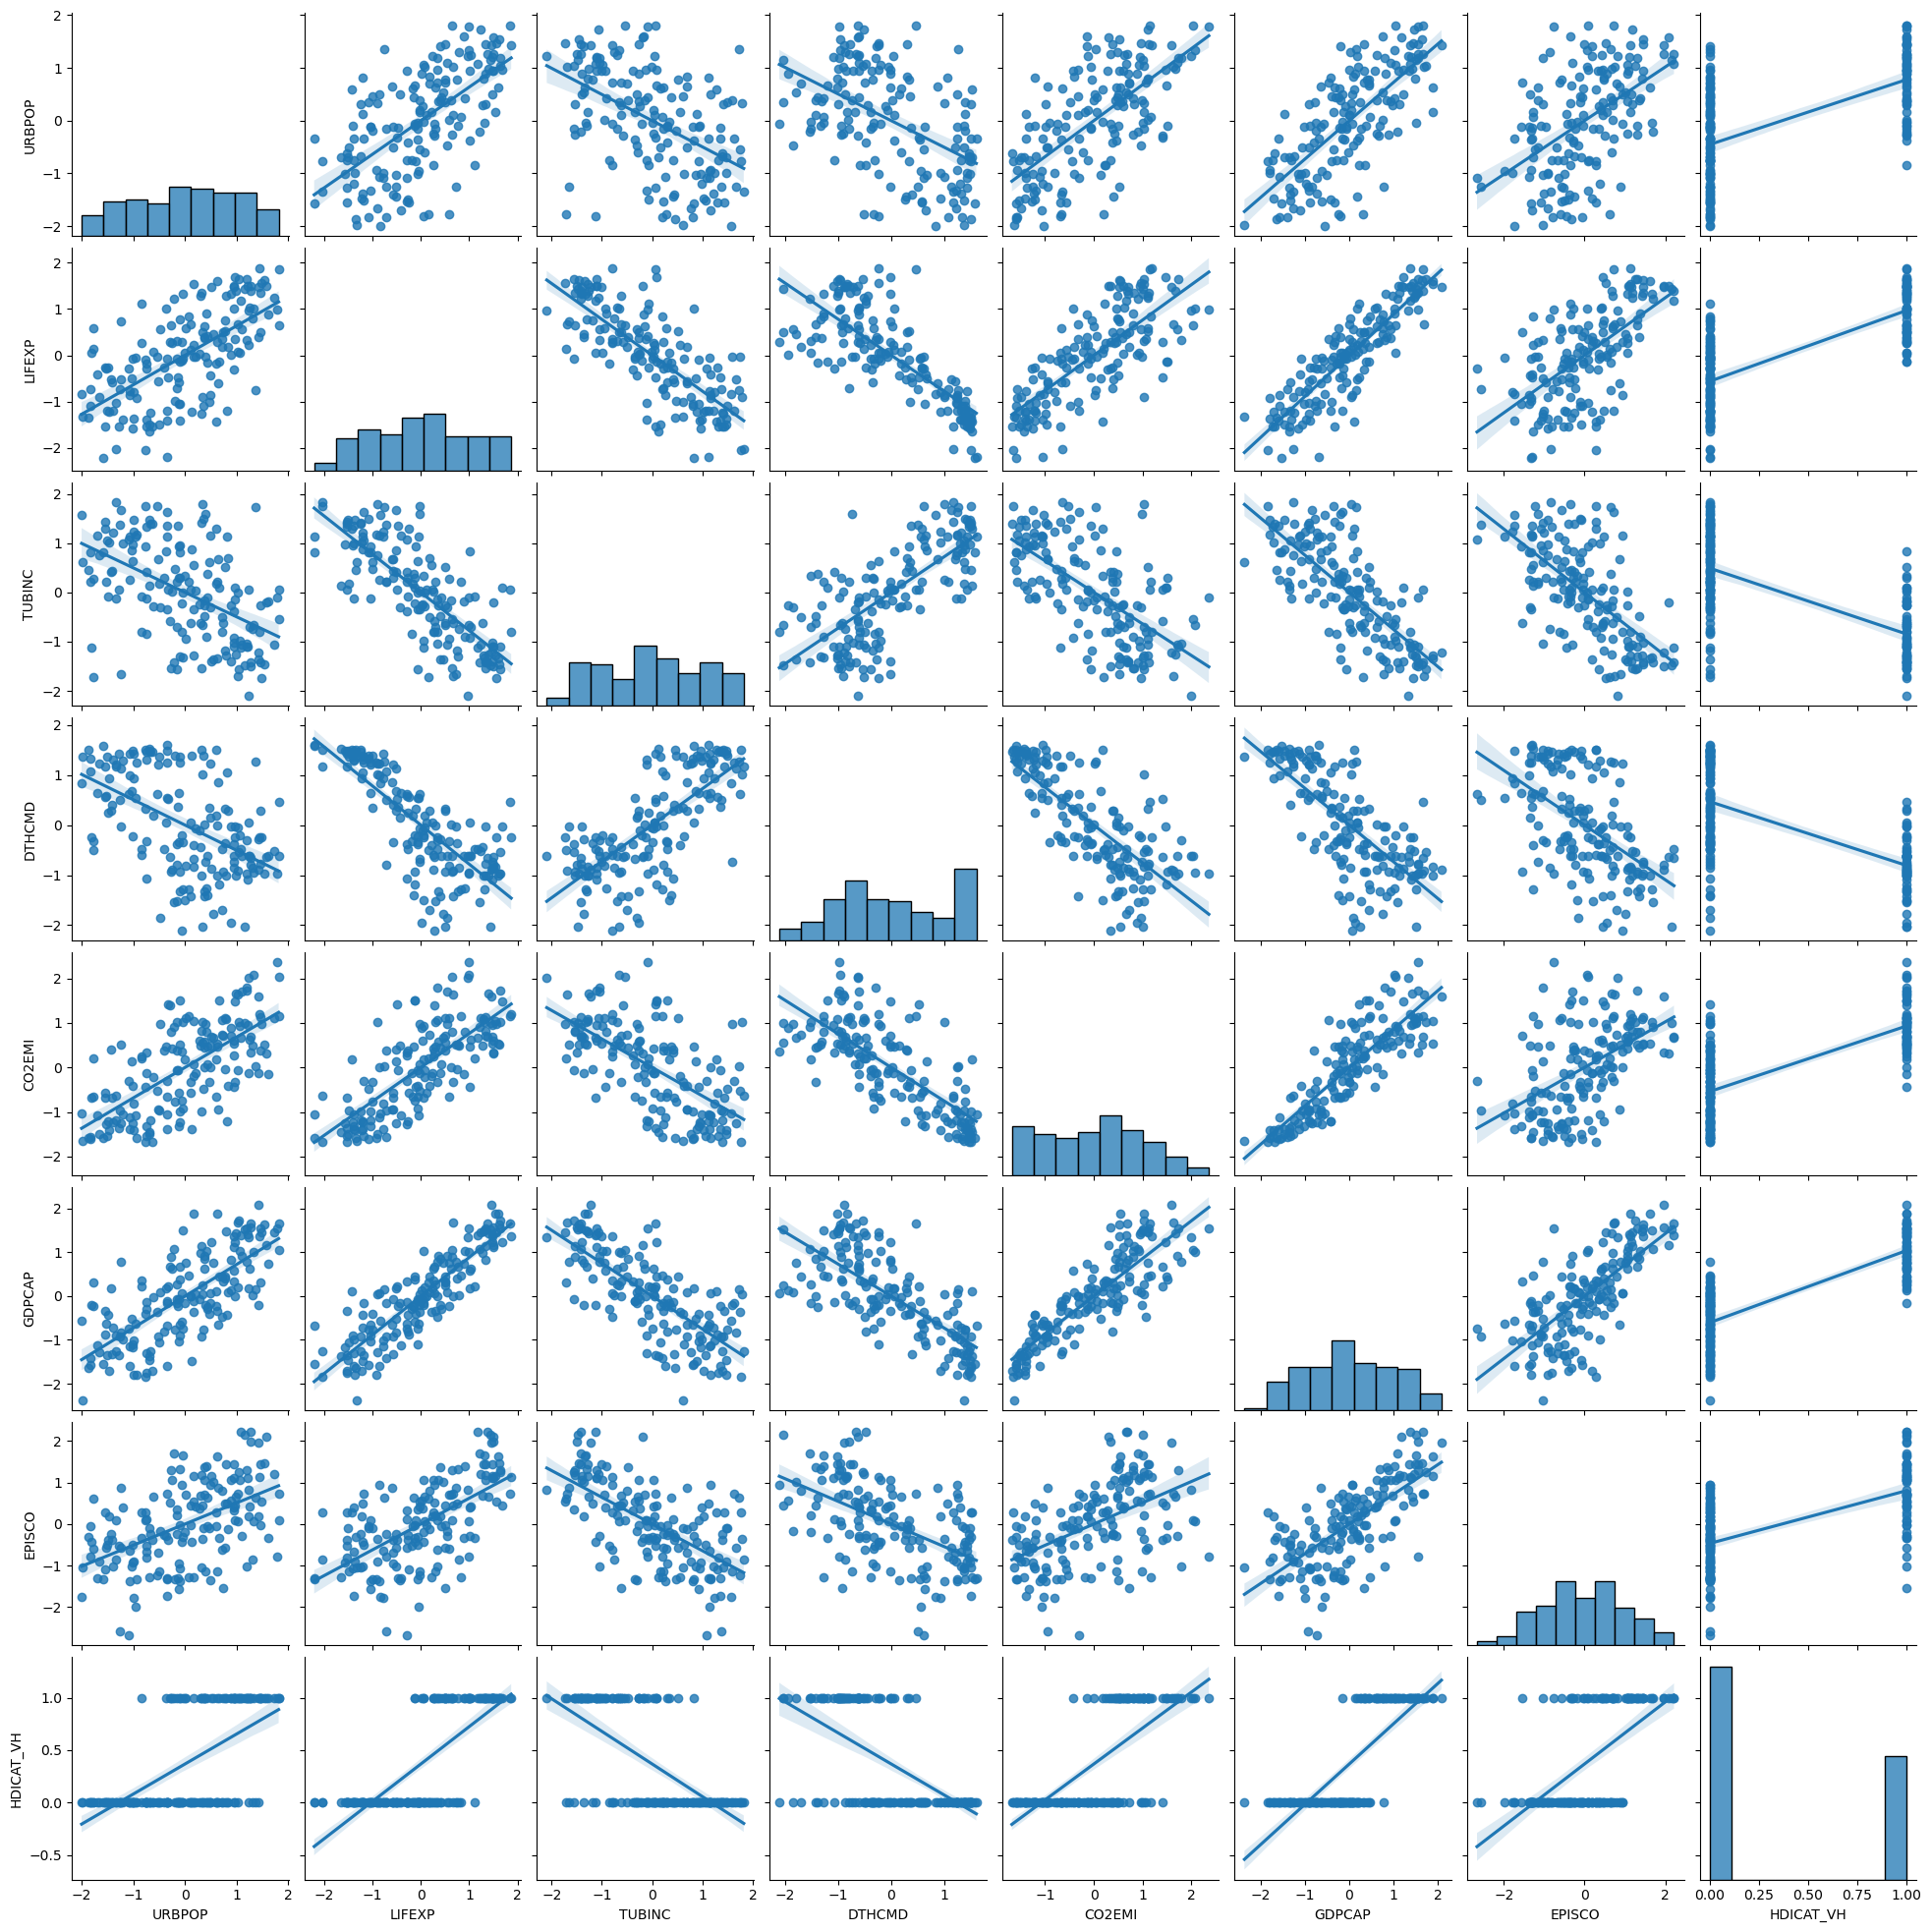

In [168]:
##################################
# Gathering the pairplot for all variables
##################################
sns.pairplot(cancer_rate_premodelling, kind='reg')
plt.show()

In [169]:
##################################
# Separating the target 
# and predictor columns
##################################
X = cancer_rate_premodelling.drop('CANRAT', axis = 1)
y = cancer_rate_premodelling['CANRAT'].cat.codes

In [170]:
##################################
# Formulating the train and test data
# using a 70-30 ratio
##################################
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 88888888, stratify=y)

In [171]:
##################################
# Performing a general exploration of the train dataset
##################################
print('Dataset Dimensions: ')
display(X_train.shape)

Dataset Dimensions: 


(114, 8)

In [172]:
##################################
# Validating the class distribution of the train dataset
##################################
y_train.value_counts(normalize = True)

0    0.745614
1    0.254386
dtype: float64

In [173]:
##################################
# Performing a general exploration of the test dataset
##################################
print('Dataset Dimensions: ')
display(X_test.shape)

Dataset Dimensions: 


(49, 8)

In [174]:
##################################
# Validating the class distribution of the test dataset
##################################
y_test.value_counts(normalize = True)

0    0.755102
1    0.244898
dtype: float64

In [175]:
##################################
# Defining a function to compute
# model performance
##################################
def model_performance_evaluation(y_true, y_pred):
    metric_name = ['Accuracy','Precision','Recall','F1','AUROC']
    metric_value = [accuracy_score(y_true, y_pred),
                   precision_score(y_true, y_pred),
                   recall_score(y_true, y_pred),
                   f1_score(y_true, y_pred),
                   roc_auc_score(y_true, y_pred)]    
    metric_summary = pd.DataFrame(zip(metric_name, metric_value),
                                  columns=['metric_name','metric_value']) 
    return(metric_summary)

### 1.7.2 Logistic Regression <a class="anchor" id="1.7.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

In [177]:
##################################
# Creating an instance of the 
# Logistic Regression model
##################################
logistic_regression = LogisticRegression()

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear','saga'],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Logistic Regression model
##################################
weighted_logistic_regression = GridSearchCV(estimator = logistic_regression, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Logistic Regression model
##################################
weighted_logistic_regression.fit(X_train, y_train)

##################################
# Determining the weighted hyperparameter
# for the Logistic Regression model
##################################
weighted_logistic_regression.best_score_ 
weighted_logistic_regression.best_params_

{'C': 1.0,
 'class_weight': {0: 0.25, 1: 0.75},
 'penalty': 'l2',
 'random_state': 88888888,
 'solver': 'liblinear'}

In [178]:
##################################
# Evaluating the weighted logistic regression model
# on the train set
##################################
weighted_logistic_regression_y_hat_train = weighted_logistic_regression.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_logistic_regression_performance_train = model_performance_evaluation(y_train, weighted_logistic_regression_y_hat_train)
weighted_logistic_regression_performance_train['model'] = ['weighted_logistic_regression'] * 5
weighted_logistic_regression_performance_train['set'] = ['train'] * 5
print('Weighted Logistic Regression Model Performance on Train Data: ')
display(weighted_logistic_regression_performance_train)

Weighted Logistic Regression Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.894737,weighted_logistic_regression,train
1,Precision,0.707317,weighted_logistic_regression,train
2,Recall,1.000000,weighted_logistic_regression,train
3,F1,0.828571,weighted_logistic_regression,train
4,AUROC,0.929412,weighted_logistic_regression,train


In [179]:
##################################
# Evaluating the weighted logistic regression model
# on the test set
##################################
weighted_logistic_regression_y_hat_test = weighted_logistic_regression.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_logistic_regression_performance_test = model_performance_evaluation(y_test, weighted_logistic_regression_y_hat_test)
weighted_logistic_regression_performance_test['model'] = ['weighted_logistic_regression'] * 5
weighted_logistic_regression_performance_test['set'] = ['test'] * 5
print('Weighted Logistic Regression Model Performance on Test Data: ')
display(weighted_logistic_regression_performance_test)

Weighted Logistic Regression Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.938776,weighted_logistic_regression,test
1,Precision,0.846154,weighted_logistic_regression,test
2,Recall,0.916667,weighted_logistic_regression,test
3,F1,0.880000,weighted_logistic_regression,test
4,AUROC,0.931306,weighted_logistic_regression,test


### 1.7.3 Decision Trees <a class="anchor" id="1.7.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

In [180]:
##################################
# Creating an instance of the 
# Decision Tree model
##################################
decision_tree = DecisionTreeClassifier()

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Decision Tree model
##################################
weighted_decision_tree = GridSearchCV(estimator = decision_tree, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Decision Tree model
##################################
weighted_decision_tree.fit(X_train, y_train)

##################################
# Determining the weighted hyperparameter
# for the Decision Tree model
##################################
weighted_decision_tree.best_score_ 
weighted_decision_tree.best_params_

{'class_weight': {0: 0.25, 1: 0.75},
 'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'random_state': 88888888}

In [181]:
##################################
# Evaluating the weighted decision tree model
# on the train set
##################################
weighted_decision_tree_y_hat_train = weighted_decision_tree.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_decision_tree_performance_train = model_performance_evaluation(y_train, weighted_decision_tree_y_hat_train)
weighted_decision_tree_performance_train['model'] = ['weighted_decision_tree'] * 5
weighted_decision_tree_performance_train['set'] = ['train'] * 5
print('Weighted Decision Tree Model Performance on Train Data: ')
display(weighted_decision_tree_performance_train)

Weighted Decision Tree Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.956140,weighted_decision_tree,train
1,Precision,0.852941,weighted_decision_tree,train
2,Recall,1.000000,weighted_decision_tree,train
3,F1,0.920635,weighted_decision_tree,train
4,AUROC,0.970588,weighted_decision_tree,train


In [182]:
##################################
# Evaluating the weighted decision tree model
# on the test set
##################################
weighted_decision_tree_y_hat_test = weighted_decision_tree.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_decision_tree_performance_test = model_performance_evaluation(y_test, weighted_decision_tree_y_hat_test)
weighted_decision_tree_performance_test['model'] = ['weighted_decision_tree'] * 5
weighted_decision_tree_performance_test['set'] = ['test'] * 5
print('Weighted Decision Tree Model Performance on Test Data: ')
display(weighted_decision_tree_performance_test)

Weighted Decision Tree Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.897959,weighted_decision_tree,test
1,Precision,0.769231,weighted_decision_tree,test
2,Recall,0.833333,weighted_decision_tree,test
3,F1,0.800000,weighted_decision_tree,test
4,AUROC,0.876126,weighted_decision_tree,test


### 1.7.4 Random Forest <a class="anchor" id="1.7.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

In [183]:
##################################
# Creating an instance of the 
# Random Forest model
##################################
random_forest = RandomForestClassifier()

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
hyperparameter_grid = {
    'criterion': ['gini','entropy','log_loss'],
    'max_depth': [3,5,7],
    'min_samples_leaf': [3,5,10],
    'n_estimators': [3,5,7],
    'max_features':['sqrt', 'log2'],
    'class_weight': [{0:0.25, 1:0.75}],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Random Forest model
##################################
weighted_random_forest = GridSearchCV(estimator = random_forest, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Random Forest model
##################################
weighted_random_forest.fit(X_train, y_train)

##################################
# Determining the weighted hyperparameter
# for the Random Forest model
##################################
weighted_random_forest.best_score_ 
weighted_random_forest.best_params_

{'class_weight': {0: 0.25, 1: 0.75},
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'n_estimators': 3,
 'random_state': 88888888}

In [184]:
##################################
# Evaluating the weighted Random Forest model
# on the train set
##################################
weighted_random_forest_y_hat_train = weighted_random_forest.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_random_forest_performance_train = model_performance_evaluation(y_train, weighted_random_forest_y_hat_train)
weighted_random_forest_performance_train['model'] = ['weighted_random_forest'] * 5
weighted_random_forest_performance_train['set'] = ['train'] * 5
print('Weighted Random Forest Model Performance on Train Data: ')
display(weighted_random_forest_performance_train)

Weighted Random Forest Model Performance on Train Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.929825,weighted_random_forest,train
1,Precision,0.800000,weighted_random_forest,train
2,Recall,0.965517,weighted_random_forest,train
3,F1,0.875000,weighted_random_forest,train
4,AUROC,0.941582,weighted_random_forest,train


In [185]:
##################################
# Evaluating the weighted Random Forest model
# on the test set
##################################
weighted_random_forest_y_hat_test = weighted_random_forest.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_random_forest_performance_test = model_performance_evaluation(y_test, weighted_random_forest_y_hat_test)
weighted_random_forest_performance_test['model'] = ['weighted_random_forest'] * 5
weighted_random_forest_performance_test['set'] = ['test'] * 5
print('Weighted Random Forest Model Performance on Test Data: ')
display(weighted_random_forest_performance_test)

Weighted Random Forest Model Performance on Test Data: 


,metric_name,metric_value,model,set
0,Accuracy,0.938776,weighted_random_forest,test
1,Precision,0.909091,weighted_random_forest,test
2,Recall,0.833333,weighted_random_forest,test
3,F1,0.869565,weighted_random_forest,test
4,AUROC,0.903153,weighted_random_forest,test


### 1.7.5 Support Vector Machine <a class="anchor" id="1.7.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

In [ ]:
##################################
# Creating an instance of the 
# Support Vector Machine model
##################################
support_vector_machine = SVC()

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
hyperparameter_grid = {
    'C': [1.0],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'class_weight': [None],
    'random_state': [88888888]}

##################################
# Defining the hyperparameters for the
# Support Vector Machine model
##################################
weighted_support_vector_machine = GridSearchCV(estimator = support_vector_machine, 
                                           param_grid = hyperparameter_grid,
                                           n_jobs = -1,
                                           scoring='f1')

##################################
# Fitting the weighted Support Vector Machine model
##################################
weighted_support_vector_machine.fit(X_train, y_train)

##################################
# Determining the weighted hyperparameter
# for the Support Vector Machine model
##################################
weighted_support_vector_machine.best_score_ 
weighted_support_vector_machine.best_params_

In [ ]:
##################################
# Evaluating the weighted Support Vector Machine model
# on the train set
##################################
weighted_support_vector_machine_y_hat_train = weighted_support_vector_machine.predict(X_train)

##################################
# Gathering the model evaluation metrics
##################################
weighted_support_vector_machine_performance_train = model_performance_evaluation(y_train, weighted_support_vector_machine_y_hat_train)
weighted_support_vector_machine_performance_train['model'] = ['weighted_support_vector_machine'] * 5
weighted_support_vector_machine_performance_train['set'] = ['train'] * 5
print('Weighted Support Vector Machine Model Performance on Train Data: ')
display(weighted_support_vector_machine_performance_train)

In [ ]:
##################################
# Evaluating the weighted Support Vector Machine model
# on the test set
##################################
weighted_support_vector_machine_y_hat_test = weighted_support_vector_machine.predict(X_test)

##################################
# Gathering the model evaluation metrics
##################################
weighted_support_vector_machine_performance_test = model_performance_evaluation(y_test, weighted_support_vector_machine_y_hat_test)
weighted_support_vector_machine_performance_test['model'] = ['weighted_support_vector_machine'] * 5
weighted_support_vector_machine_performance_test['set'] = ['test'] * 5
print('Weighted Support Vector Machine Model Performance on Test Data: ')
display(weighted_support_vector_machine_performance_test)

## 1.8. Model Development With SMOTE Upsampling <a class="anchor" id="1.8"></a>

### 1.8.1 Premodelling Data Description <a class="anchor" id="1.8.1"></a>

### 1.8.2 Logistic Regression <a class="anchor" id="1.8.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

### 1.8.3 Decision Trees <a class="anchor" id="1.8.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

### 1.8.4 Random Forest <a class="anchor" id="1.8.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

### 1.8.5 Support Vector Machine <a class="anchor" id="1.8.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

## 1.9. Model Development With CNN Downsampling <a class="anchor" id="1.9"></a>

### 1.9.1 Premodelling Data Description <a class="anchor" id="1.9.1"></a>

### 1.9.2 Logistic Regression <a class="anchor" id="1.9.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

### 1.9.3 Decision Trees <a class="anchor" id="1.9.3"></a>

[Decision trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) create a model that predicts the class label of a sample based on input features. A decision tree consists of nodes that represent decisions or choices, edges which connect nodes and represent the possible outcomes of a decision and leaf (or terminal) nodes which represent the final decision or the predicted class label. The decision-making process involves feature selection (at each internal node, the algorithm decides which feature to split on based on a certain criterion including gini impurity or entropy), splitting criteria (the splitting criteria aim to find the feature and its corresponding threshold that best separates the data into different classes. The goal is to increase homogeneity within each resulting subset), recursive splitting (the process of feature selection and splitting continues recursively, creating a tree structure. The dataset is partitioned at each internal node based on the chosen feature, and the process repeats for each subset) and stopping criteria (the recursion stops when a certain condition is met, known as a stopping criterion. Common stopping criteria include a maximum depth for the tree, a minimum number of samples required to split a node, or a minimum number of samples in a leaf node.)

### 1.9.4 Random Forest <a class="anchor" id="1.9.4"></a>

[Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) is an ensemble learning method made up of a large set of small decision trees called estimators, with each producing its own prediction. The random forest model aggregates the predictions of the estimators to produce a more accurate prediction. The algorithm involves bootstrap aggregating (where smaller subsets of the training data are repeatedly subsampled with replacement), random subspacing (where a subset of features are sampled and used to train each individual estimator), estimator training (where unpruned decision trees are formulated for each estimator) and inference by aggregating the predictions of all estimators.

### 1.9.5 Support Vector Machine <a class="anchor" id="1.9.6"></a>

[Support Vector Machine](https://dl.acm.org/doi/10.1145/130385.130401) plots each observation in an N-dimensional space corresponding to the number of features in the data set and finds a hyperplane that maximally separates the different classes by a maximally large margin (which is defined as the distance between the hyperplane and the closest data points from each class). The algorithm applies kernel transformation by mapping non-linearly separable data using the similarities between the points in a high-dimensional feature space for improved discrimination.

## 1.10. Model Development With Stacking Ensemble Learning <a class="anchor" id="1.9"></a>

### 1.10.1 Premodelling Data Description <a class="anchor" id="1.10.1"></a>

### 1.10.2 Logistic Regression <a class="anchor" id="1.10.2"></a>

[Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) models the relationship between the probability of an event (among two outcome levels) by having the log-odds of the event be a linear combination of a set of predictors weighted by their respective parameter estimates. The parameters are estimated via maximum likelihood estimation by testing different values through multiple iterations to optimize for the best fit of log odds. All of these iterations produce the log likelihood function, and logistic regression seeks to maximize this function to find the best parameter estimates. Given the optimal parameters, the conditional probabilities for each observation can be calculated, logged, and summed together to yield a predicted probability.

# 2. Summary <a class="anchor" id="Summary"></a>


# 3. References <a class="anchor" id="References"></a>

* **[Book]** [Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python](https://machinelearningmastery.com/data-preparation-for-machine-learning/) by Jason Brownlee
* **[Book]** [Feature Engineering and Selection: A Practical Approach for Predictive Models](http://www.feat.engineering/) by Max Kuhn and Kjell Johnson
* **[Book]** [Feature Engineering for Machine Learning](https://www.oreilly.com/library/view/feature-engineering-for/9781491953235/) by Alice Zheng and Amanda Casari
* **[Book]** [Applied Predictive Modeling](https://link.springer.com/book/10.1007/978-1-4614-6849-3?page=1) by Max Kuhn and Kjell Johnson
* **[Book]** [Data Mining: Practical Machine Learning Tools and Techniques](https://www.sciencedirect.com/book/9780123748560/data-mining-practical-machine-learning-tools-and-techniques?via=ihub=) by Ian Witten, Eibe Frank, Mark Hall and Christopher Pal 
* **[Book]** [Data Cleaning](https://dl.acm.org/doi/book/10.1145/3310205) by Ihab Ilyas and Xu Chu
* **[Book]** [Data Wrangling with Python](https://www.oreilly.com/library/view/data-wrangling-with/9781491948804/) by Jacqueline Kazil and Katharine Jarmul
* **[Book]** [Regression Modeling Strategies](https://link.springer.com/book/10.1007/978-1-4757-3462-1) by Frank Harrell
* **[Python Library API]** [NumPy](https://numpy.org/doc/) by NumPy Team
* **[Python Library API]** [pandas](https://pandas.pydata.org/docs/) by Pandas Team
* **[Python Library API]** [seaborn](https://seaborn.pydata.org/) by Seaborn Team
* **[Python Library API]** [matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) by MatPlotLib Team
* **[Python Library API]** [itertools](https://docs.python.org/3/library/itertools.html) by Python Team
* **[Python Library API]** [operator](https://docs.python.org/3/library/operator.html) by Python Team
* **[Python Library API]** [sklearn.experimental](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.experimental) by Scikit-Learn Team
* **[Python Library API]** [sklearn.impute](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute) by Scikit-Learn Team
* **[Python Library API]** [sklearn.linear_model](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) by Scikit-Learn Team
* **[Python Library API]** [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) by Scikit-Learn Team
* **[Python Library API]** [scipy](https://docs.scipy.org/doc/scipy/) by SciPy Team
* **[Article]** [Step-by-Step Exploratory Data Analysis (EDA) using Python](https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20with,distributions%20using%20Python%20programming%20language.) by Malamahadevan Mahadevan (Analytics Vidhya)
* **[Article]** [Exploratory Data Analysis in Python — A Step-by-Step Process](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) by Andrea D'Agostino (Towards Data Science)
* **[Article]** [Exploratory Data Analysis with Python](https://medium.com/@douglas.rochedo/exploratory-data-analysis-with-python-78b6c1d479cc) by Douglas Rocha (Medium)
* **[Article]** [4 Ways to Automate Exploratory Data Analysis (EDA) in Python](https://builtin.com/data-science/EDA-python) by Abdishakur Hassan (BuiltIn)
* **[Article]** [10 Things To Do When Conducting Your Exploratory Data Analysis (EDA)](https://www.analyticsvidhya.com) by Alifia Harmadi (Medium)
* **[Article]** [How to Handle Missing Data with Python](https://machinelearningmastery.com/handle-missing-data-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Statistical Imputation for Missing Values in Machine Learning](https://machinelearningmastery.com/statistical-imputation-for-missing-values-in-machine-learning/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Imputing Missing Data with Simple and Advanced Techniques](https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87) by Idil Ismiguzel (Towards Data Science)
* **[Article]** [Missing Data Imputation Approaches | How to handle missing values in Python](https://www.machinelearningplus.com/machine-learning/missing-data-imputation-how-to-handle-missing-values-in-python/) by Selva Prabhakaran (Machine Learning +)
* **[Article]** [Master The Skills Of Missing Data Imputation Techniques In Python(2022) And Be Successful](https://medium.com/analytics-vidhya/a-quick-guide-on-missing-data-imputation-techniques-in-python-2020-5410f3df1c1e) by Mrinal Walia (Analytics Vidhya)
* **[Article]** [How to Preprocess Data in Python](https://builtin.com/machine-learning/how-to-preprocess-data-python) by Afroz Chakure (BuiltIn)
* **[Article]** [Easy Guide To Data Preprocessing In Python](https://www.kdnuggets.com/2020/07/easy-guide-data-preprocessing-python.html) by Ahmad Anis (KDNuggets)
* **[Article]** [Data Preprocessing in Python](https://towardsdatascience.com/data-preprocessing-in-python-b52b652e37d5) by Tarun Gupta (Towards Data Science)
* **[Article]** [Data Preprocessing using Python](https://medium.com/@suneet.bhopal/data-preprocessing-using-python-1bfee9268fb3) by Suneet Jain (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.com/@abonia/data-preprocessing-in-python-1f90d95d44f4) by Abonia Sojasingarayar (Medium)
* **[Article]** [Data Preprocessing in Python](https://medium.datadriveninvestor.com/data-preprocessing-3cd01eefd438) by Afroz Chakure (Medium)
* **[Article]** [Detecting and Treating Outliers | Treating the Odd One Out!](https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/) by Harika Bonthu (Analytics Vidhya)
* **[Article]** [Outlier Treatment with Python](https://medium.com/analytics-vidhya/outlier-treatment-9bbe87384d02) by Sangita Yemulwar (Analytics Vidhya)
* **[Article]** [A Guide to Outlier Detection in Python](https://builtin.com/data-science/outlier-detection-python) by Sadrach Pierre (BuiltIn)
* **[Article]** [How To Find Outliers in Data Using Python (and How To Handle Them)](https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/) by Eric Kleppen (Career Foundry)
* **[Article]** [Statistics in Python — Collinearity and Multicollinearity](https://towardsdatascience.com/statistics-in-python-collinearity-and-multicollinearity-4cc4dcd82b3f) by Wei-Meng Lee (Towards Data Science)
* **[Article]** [Understanding Multicollinearity and How to Detect it in Python](https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc) by Terence Shin (Towards Data Science)
* **[Article]** [A Python Library to Remove Collinearity](https://www.yourdatateacher.com/2021/06/28/a-python-library-to-remove-collinearity/) by Gianluca Malato (Your Data Teacher)
* **[Article]** [8 Best Data Transformation in Pandas](https://ai.plainenglish.io/data-transformation-in-pandas-29b2b3c61b34) by Tirendaz AI (Medium)
* **[Article]** [Data Transformation Techniques with Python: Elevate Your Data Game!](https://medium.com/@siddharthverma.er.cse/data-transformation-techniques-with-python-elevate-your-data-game-21fcc7442cc2) by Siddharth Verma (Medium)
* **[Article]** [Data Scaling with Python](https://www.kdnuggets.com/2023/07/data-scaling-python.html) by Benjamin Obi Tayo (KDNuggets)
* **[Article]** [How to Use StandardScaler and MinMaxScaler Transforms in Python](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Feature Engineering: Scaling, Normalization, and Standardization](https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/) by Aniruddha Bhandari  (Analytics Vidhya)
* **[Article]** [How to Normalize Data Using scikit-learn in Python](https://www.digitalocean.com/community/tutorials/normalize-data-in-python) by Jayant Verma (Digital Ocean)
* **[Article]** [What are Categorical Data Encoding Methods | Binary Encoding](https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/) by Shipra Saxena  (Analytics Vidhya)
* **[Article]** [Guide to Encoding Categorical Values in Python](https://pbpython.com/categorical-encoding.html) by Chris Moffitt (Practical Business Python)
* **[Article]** [Categorical Data Encoding Techniques in Python: A Complete Guide](https://soumenatta.medium.com/categorical-data-encoding-techniques-in-python-a-complete-guide-a913aae19a22) by Soumen Atta (Medium)
* **[Article]** [Categorical Feature Encoding Techniques](https://towardsdatascience.com/categorical-encoding-techniques-93ebd18e1f24) by Tara Boyle (Medium)
* **[Article]** [Ordinal and One-Hot Encodings for Categorical Data](https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [Hypothesis Testing with Python: Step by Step Hands-On Tutorial with Practical Examples](https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e) by Ece Işık Polat (Towards Data Science)
* **[Article]** [17 Statistical Hypothesis Tests in Python (Cheat Sheet)](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/) by Jason Brownlee (Machine Learning Mastery)
* **[Article]** [A Step-by-Step Guide to Hypothesis Testing in Python using Scipy](https://medium.com/@gabriel_renno/a-step-by-step-guide-to-hypothesis-testing-in-python-using-scipy-8eb5b696ab07) by Gabriel Rennó (Medium)
* **[Publication]** [Data Quality for Machine Learning Tasks](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Nitin Gupta, Shashank Mujumdar, Hima Patel, Satoshi Masuda, Naveen Panwar, Sambaran Bandyopadhyay, Sameep Mehta, Shanmukha Guttula, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’21: Proceedings of the 27th ACM SIGKDD Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Overview and Importance of Data Quality for Machine Learning Tasks](https://dl.acm.org/doi/10.1145/3394486.3406477) by Abhinav Jain, Hima Patel, Lokesh Nagalapatti, Nitin Gupta, Sameep Mehta, Shanmukha Guttula, Shashank Mujumdar, Shazia Afzal, Ruhi Sharma Mittal and Vitobha Munigala (KDD ’20: Proceedings of the 26th ACM SIGKDD International Conference on Knowledge Discovery & Data Mining)
* **[Publication]** [Multiple Imputation of Discrete and Continuous Data by Fully Conditional Specification](https://journals.sagepub.com/doi/10.1177/0962280206074463) by Stef van Buuren (Statistical Methods in Medical Research)
* **[Publication]** [Mathematical Contributions to the Theory of Evolution: Regression, Heredity and Panmixia](https://royalsocietypublishing.org/doi/10.1098/rsta.1896.0007) by Karl Pearson (Royal Society)
* **[Publication]** [A New Family of Power Transformations to Improve Normality or Symmetry](https://academic.oup.com/biomet/article-abstract/87/4/954/232908?redirectedFrom=fulltext&login=false) by In-Kwon Yeo and Richard Johnson (Biometrika)
* **[Publication]** [The Origins of Logistic Regression](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=360300) by JS Cramer (Econometrics eJournal)
* **[Publication]** [Classification and Regression Trees](https://www.semanticscholar.org/paper/Classification-and-Regression-Trees-Breiman-Friedman/8017699564136f93af21575810d557dba1ee6fc6) by Leo Breiman, Jerome Friedman, Richard Olshen and Charles Stone (Computer Science)
* **[Publication]** [Random Forest](https://link.springer.com/article/10.1023/A:1010933404324) by Leo Breiman (Machine Learning)
* **[Publication]** [A Training Algorithm for Optimal Margin Classifiers](https://dl.acm.org/doi/10.1145/130385.130401) by Bernhard Boser, Isabelle Guyon and Vladimir Vapnik (Proceedings of the Fifth Annual Workshop on Computational Learning Theory)

***

In [176]:
from IPython.display import display, HTML
display(HTML("<style>.rendered_html { font-size: 15px; font-family: 'Trebuchet MS'; }</style>"))